# Car Price Prediction


## Problem Statement:


With the covid 19 impact in the market, we have seen lot of changes in the car market. Now some cars are in demand hence making them costly and some are not in demand hence cheaper. One of our clients works with small traders, who sell used cars. With the change in market due to covid 19 impact, our client is facing problems with their previous car price valuation machine learning models. So, they are looking for new machine learning models from new data. We have to make car price valuation model. This project contains two phase-

## 1. Data Collection Phase


I have done web scraping to collect the data of used cars from the well known website www.cardekho.com where I found more features of cars compared to other websites and I fetch data for different locations. As per the requirement of our client we need to build the model to predict the prices of these used cars.

## 2. Model Building Phase

After collecting the data, I need to build a machine learning model. Before model building we need to do all data pre-processing steps. The complete life cycle of data science that I have used in this project are as follows:

Data Cleaning


Exploratory Data Analysis


Data Pre-processing


Model Building


Model Evaluation


Selecting the best model


## Importing necessary libraries


In [2]:
# Preprocessing
import numpy as np
import pandas as pd
# Visualization
import seaborn as sns
import matplotlib.pyplot as plt
import os
import scipy as stats
from scipy.stats import zscore   # To remove outliers
from sklearn.preprocessing import PowerTransformer  # To remove skewness
# Evaluation Metrics
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
# ML Algorithms
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import BaggingRegressor
!pip3 install xgboost
import xgboost as xgb
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.model_selection import GridSearchCV
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

## Importing dataset


In [3]:
# Reading excel file
df = pd.read_excel("Used_Cars.xlsx")
df

,Unnamed: 0,Car_Name,Fuel_type,Running_in_kms,Endine_disp,Gear_transmission,Milage_in_km/ltr,Seating_cap,color,Max_power,...,rear_brake_type,cargo_volume,height,width,length,Weight,Insp_score,top_speed,City_url,Car_price
0,0,2019 Maruti Swift,Petrol,"11,241 kms",1197,Manual,21.21 kmpl,5,White,81.80,...,Drum,268,1530,1735,3840,1315,NaN,-,https://www.cardekho.com/used-cars+in+ahmedabad,6.19 Lakh
1,1,2018 Maruti Alto K10,Petrol,"27,994 kms",998,Manual,23.95 kmpl,5,Superior white,67.05,...,Drum,177,1475,1515,3545,1210,NaN,145 Kmph,https://www.cardekho.com/used-cars+in+ahmedabad,3.45 Lakh
2,2,2016 Maruti Swift,Diesel,"80,728 kms",1248,Manual,25.2 kmpl,5,Silver,74,...,Drum,204-liters,1530,1735,3840,1405,NaN,155 Kmph,https://www.cardekho.com/used-cars+in+ahmedabad,4.80 Lakh
3,3,2015 Maruti SX4 S Cross,Diesel,"46,390 kms",1598,Manual,22.7 kmpl,5,Urban Blue,118,...,Solid Disc,353-litres,1590,1765,4300,1740,NaN,180 Kmph,https://www.cardekho.com/used-cars+in+ahmedabad,6.35 Lakh
4,4,2019 Jeep Compass,Petrol,"32,294 kms",1368,Automatic,16 kmpl,5,Grey,160.77,...,Discs,408-litres,1640,1818,4395,-,NaN,186.69 kmph,https://www.cardekho.com/used-cars+in+ahmedabad,17.05 Lakh
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10743,10743,2010 Maruti 800,Petrol,"70,000 kms",796,Manual,16.1 kmpl,4,White,37,...,Drum,-,1405,1440,3335,1000,-,144km/hr,https://www.cardekho.com/used-cars+in+lucknow,67500
10744,10744,2012 Tata Indica,Diesel,"32,000 kms",1405,Manual,19.4 kmpl,5,White,70,...,Drum,232-litre,1550,1695,3795,-,-,-,https://www.cardekho.com/used-cars+in+lucknow,1.50 Lakh
10745,10745,2005 Hyundai Santro,Petrol,"50,000 kms",999,Manual,-,5,Black,-,...,-,-,-,-,-,-,-,-,https://www.cardekho.com/used-cars+in+lucknow,65000
10746,10746,2017 Hyundai Creta,Diesel,"25,000 kms",1582,Manual,19.67 kmpl,5,-,126.2,...,Drum,400-litres,1630,1780,4270,-,-,190 Kmph,https://www.cardekho.com/used-cars+in+lucknow,10.50 Lakh


Here I am importing the data set which is in excel format and storing it into dataframe (df) for further usage. Here we can observe first 5 and last 5 rows of the dataset. There are 10748 rows and 21 columns in the dataframe. The dataset contains both numerical and categorical data. There are both dependent and independent variables present in the dataframe. We have our target variable "Car_Price" which stores the price of the used cars and it is continuous in nature which makes this to be a "Regression Problem".

## Exploratory Data Analysis (EDA)



In [4]:
# To display maximum columns in the dataset
pd.set_option("display.max_columns",None)
# To display maximum rows in the dataset
pd.set_option("display.max_rows",None)

Displaying maximum rows and columns present in the dataset.



In [5]:
# Dropping unwanted column
df.drop("Unnamed: 0", axis=1, inplace=True)
df.head()   # Displaying the dataframe

,Car_Name,Fuel_type,Running_in_kms,Endine_disp,Gear_transmission,Milage_in_km/ltr,Seating_cap,color,Max_power,front_brake_type,rear_brake_type,cargo_volume,height,width,length,Weight,Insp_score,top_speed,City_url,Car_price
0,2019 Maruti Swift,Petrol,"11,241 kms",1197,Manual,21.21 kmpl,5,White,81.80,Disc,Drum,268,1530,1735,3840,1315,NaN,-,https://www.cardekho.com/used-cars+in+ahmedabad,6.19 Lakh
1,2018 Maruti Alto K10,Petrol,"27,994 kms",998,Manual,23.95 kmpl,5,Superior white,67.05,Ventilated Disc,Drum,177,1475,1515,3545,1210,NaN,145 Kmph,https://www.cardekho.com/used-cars+in+ahmedabad,3.45 Lakh
2,2016 Maruti Swift,Diesel,"80,728 kms",1248,Manual,25.2 kmpl,5,Silver,74,Ventilated Disc,Drum,204-liters,1530,1735,3840,1405,NaN,155 Kmph,https://www.cardekho.com/used-cars+in+ahmedabad,4.80 Lakh
3,2015 Maruti SX4 S Cross,Diesel,"46,390 kms",1598,Manual,22.7 kmpl,5,Urban Blue,118,Ventilated Disc,Solid Disc,353-litres,1590,1765,4300,1740,NaN,180 Kmph,https://www.cardekho.com/used-cars+in+ahmedabad,6.35 Lakh
4,2019 Jeep Compass,Petrol,"32,294 kms",1368,Automatic,16 kmpl,5,Grey,160.77,Disc,Discs,408-litres,1640,1818,4395,-,NaN,186.69 kmph,https://www.cardekho.com/used-cars+in+ahmedabad,17.05 Lakh


Removed unwanted column "Unnamed: 0" from the dataset since it was only storing the index data and was not a feature column for prediction. We can observe first 5 rows of the dataset above using the head() option.

In [6]:
# Checking the dimensions of the dataset
print("There are {} rows and {} columns in our dataframe".format(df.shape[0], df.shape[1]))

There are 10748 rows and 20 columns in our dataframe


The dataset contains 10748 rows and 20 columns. Out of 20 columns 19 are independent variables and remaining one is our target variable "Car_price" which is dependent in nature.

In [7]:
# Checking the column names in the dataset
print("Columns present in our dataset:\n",df.columns)

Columns present in our dataset:
 Index(['Car_Name', 'Fuel_type', 'Running_in_kms', 'Endine_disp',
       'Gear_transmission', 'Milage_in_km/ltr', 'Seating_cap', 'color',
       'Max_power', 'front_brake_type', 'rear_brake_type', 'cargo_volume',
       'height', 'width', 'length', 'Weight', 'Insp_score', 'top_speed',
       'City_url', 'Car_price'],
      dtype='object')


These are the columns present in our dataset.



In [8]:
# Checking number of unique values in each column of dataset
df.nunique().to_frame("No of Unique Values")

,No of Unique Values
Car_Name,1445
Fuel_type,5
Running_in_kms,4449
Endine_disp,143
Gear_transmission,2
Milage_in_km/ltr,511
Seating_cap,9
color,393
Max_power,486
front_brake_type,28


Above are the number of unique values present in each of the columns of the dataset.



In [10]:
# To get good overview of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10748 entries, 0 to 10747
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Car_Name           10748 non-null  object
 1   Fuel_type          10748 non-null  object
 2   Running_in_kms     10748 non-null  object
 3   Endine_disp        10748 non-null  object
 4   Gear_transmission  10748 non-null  object
 5   Milage_in_km/ltr   10748 non-null  object
 6   Seating_cap        10748 non-null  object
 7   color              10748 non-null  object
 8   Max_power          10748 non-null  object
 9   front_brake_type   10748 non-null  object
 10  rear_brake_type    10748 non-null  object
 11  cargo_volume       10748 non-null  object
 12  height             10748 non-null  object
 13  width              10748 non-null  object
 14  length             10748 non-null  object
 15  Weight             10748 non-null  object
 16  Insp_score         8720 non-null   objec

# Data Pre-processing


From our dataset we can notice most of the columns contains corrupted values so that we need to go through lot of data-processing steps. Let's do some of the pre-processing methods on our dataset.



From the dataset we can observe there are some columns having values with "-" sign, so we will treat them as NAN values. Let's take a quick look at the columns having "-" sign by using below code.



In [11]:
# Checking which columns contains "-" sign 
df[df.columns[(df == '-').any()]].nunique()

Endine_disp         143
Milage_in_km/ltr    511
Seating_cap           9
color               393
Max_power           486
front_brake_type     28
rear_brake_type      28
cargo_volume        332
height              303
width               290
length              396
Weight              313
Insp_score           10
top_speed           296
dtype: int64

These are the columns having "-" sign with number of unique values present in the particular column.



In [12]:
# Displaying the columns containing "-" sign count and their % i.e. ((count of "-")/10748)/100

unwanted_value = pd.DataFrame(df.isin(["-"]).sum().sort_values(ascending=False))
unwanted_value.columns=['Count of "-"']
unwanted_value['% of "-" sign']=unwanted_value['Count of "-"']/107.48     # 10748)/100 = 107.48
unwanted_value

,"Count of ""-""","% of ""-"" sign"
Insp_score,8644,80.424265
Weight,5643,52.502791
top_speed,3834,35.671753
cargo_volume,1895,17.631187
Milage_in_km/ltr,310,2.884258
width,204,1.898028
height,201,1.870115
length,201,1.870115
rear_brake_type,186,1.730555
front_brake_type,184,1.711946


In [13]:
df.isna().sum()


Car_Name                0
Fuel_type               0
Running_in_kms          0
Endine_disp             0
Gear_transmission       0
Milage_in_km/ltr        0
Seating_cap             0
color                   0
Max_power               0
front_brake_type        0
rear_brake_type         0
cargo_volume            0
height                  0
width                   0
length                  0
Weight                  0
Insp_score           2028
top_speed              74
City_url                0
Car_price               0
dtype: int64

<AxesSubplot:>

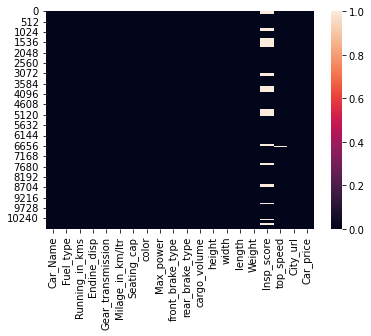

In [14]:
sns.heatmap(df.isnull())


In [15]:
# Replacing the sign as NAN values
df.replace('-',np.nan, inplace = True)
df.replace('null ',np.nan, inplace = True)

I have replaced "-" sign and the entry "null" as nan value.



In [16]:
df.isna().sum()

Car_Name                 0
Fuel_type                0
Running_in_kms           0
Endine_disp             71
Gear_transmission        0
Milage_in_km/ltr       310
Seating_cap             73
color                   81
Max_power              146
front_brake_type       184
rear_brake_type        186
cargo_volume          1895
height                 201
width                  204
length                 201
Weight                5643
Insp_score           10672
top_speed             3908
City_url                 0
Car_price                0
dtype: int64

<AxesSubplot:>

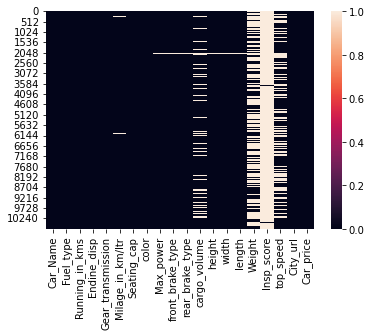

In [17]:
sns.heatmap(df.isnull())


The columns "Insp_score" and "Weight" have more than 50% of "-" sign and null values. So, we will drop those columns. And we will treat the remaining columns having these sign as NAN values, so that we can easily treat them using appropriate imputation techniques.



In [18]:
# Dropping the columns having more than 50% of "-" sign
df.drop(["Insp_score", "Weight"],axis=1,inplace=True)

I have dropped the columns which are not necessary to our predictions.



# Feature Engineering


Some of the features like "Car_Name", "Running_in_kms", "Milage_in_km/ltr", "City_url", "Max_power", "front_brake_type", "rear_brake_type", "Car_price" etc have some irrelevant values like kms, kmpl etc which we need to clean.



In [19]:
df.columns


Index(['Car_Name', 'Fuel_type', 'Running_in_kms', 'Endine_disp',
       'Gear_transmission', 'Milage_in_km/ltr', 'Seating_cap', 'color',
       'Max_power', 'front_brake_type', 'rear_brake_type', 'cargo_volume',
       'height', 'width', 'length', 'top_speed', 'City_url', 'Car_price'],
      dtype='object')

## Car_Name


The column Car_Name is containing manufacturing year of the car, Brand name of the car and model name of the car. So, I will be extracting 3 different columns from the column Car_Name.



In [20]:
# Extracting the feature "Manufacturing_year" from Car_Name column
df['Manufacturing_year'] = df['Car_Name'].str[0:4]

# Creating car_name column and storing the remaining values other than year in it. 
df['Car_name'] = df['Car_Name'].str[4:]

# Dropping Car_Name column as I have stored the data in car_name column instead
df.drop(columns = 'Car_Name', axis=1, inplace = True)

In [21]:
# Extracting Brand and Model from Car_name column
df['Brand'] = df.Car_name.str.split(' ').str.get(1)
df['Model'] = df.Car_name.str.split(' ').str[2:]
df['Model'] = df['Model'].apply(lambda x: ','.join(map(str, x)))
df['Model'] = df['Model'].str.replace(',',' ')
df.drop(columns = 'Car_name', axis=1, inplace = True)     # Dropping Car_name column after extraction

In [22]:
# Moving the columns Model, Brand and Manufacturing_year to the first, second & third position of dataframe respectively
df.insert(0, 'Model',df.pop('Model'))
df.insert(1, 'Brand',df.pop('Brand'))
df.insert(2, 'Manufacturing_year',df.pop('Manufacturing_year'))
df.head()

,Model,Brand,Manufacturing_year,Fuel_type,Running_in_kms,Endine_disp,Gear_transmission,Milage_in_km/ltr,Seating_cap,color,Max_power,front_brake_type,rear_brake_type,cargo_volume,height,width,length,top_speed,City_url,Car_price
0,Swift,Maruti,2019,Petrol,"11,241 kms",1197,Manual,21.21 kmpl,5,White,81.80,Disc,Drum,268,1530,1735,3840,NaN,https://www.cardekho.com/used-cars+in+ahmedabad,6.19 Lakh
1,Alto K10,Maruti,2018,Petrol,"27,994 kms",998,Manual,23.95 kmpl,5,Superior white,67.05,Ventilated Disc,Drum,177,1475,1515,3545,145 Kmph,https://www.cardekho.com/used-cars+in+ahmedabad,3.45 Lakh
2,Swift,Maruti,2016,Diesel,"80,728 kms",1248,Manual,25.2 kmpl,5,Silver,74,Ventilated Disc,Drum,204-liters,1530,1735,3840,155 Kmph,https://www.cardekho.com/used-cars+in+ahmedabad,4.80 Lakh
3,SX4 S Cross,Maruti,2015,Diesel,"46,390 kms",1598,Manual,22.7 kmpl,5,Urban Blue,118,Ventilated Disc,Solid Disc,353-litres,1590,1765,4300,180 Kmph,https://www.cardekho.com/used-cars+in+ahmedabad,6.35 Lakh
4,Compass,Jeep,2019,Petrol,"32,294 kms",1368,Automatic,16 kmpl,5,Grey,160.77,Disc,Discs,408-litres,1640,1818,4395,186.69 kmph,https://www.cardekho.com/used-cars+in+ahmedabad,17.05 Lakh


As we can see, we have successfully extracted the features Manufacturing_year, Brand and Model from Car_name column and moved these columns from last position to starting position of the dataframe using insert() method.



# Running_in_kms


The column "Running_in_kms" is showing object data type since it is having some string value like kms, and "," sign in it. But it should be continuous data so, I will remove string value "kms" and the comma sign "," by replacing them with empty space and then convert the column into float data type.



In [24]:
# Replacing kms and "," sign by empty space from the column
df['Running_in_kms'] = df['Running_in_kms'].str.replace('kms','')
df['Running_in_kms'] = df['Running_in_kms'].str.replace(',','')

In [25]:
# Converting object data type into float data type
df['Running_in_kms'] = df['Running_in_kms'].astype('float')

I have successfully converted string values and comma sign from the column and also converted object data type of "Running_in_kms" column into float data type.



# Car_price


The target variable "Car_price" should be continuous data but due to some string values like "Lakh", "Cr" and "," it is showing as object data type. So, we will replace 'Lakh' by 100000, 'Cr' by 10000000 and "," by empty space. Then we will split it into two columns as price_a and price_b, where price_a column to be having numerical entries (like 5.50, 4.50 etc) which are present in the Car_price column and price_b column to be having string values like "Lakh", "Cr". That is storing numerical values in price_a column and string values in price_b column and after that multiply these two columns to get exact car price in numerical format.



In [26]:
# Replacing string values and "," sign 
df['Car_Price'] = df['Car_price'].str.replace('Lakh','100000')
df['Car_Price'] = df['Car_Price'].str.replace(',','')
df['Car_Price'] = df['Car_Price'].str.replace('Cr','10000000')

In [27]:
# Splitting the column into two columns
df[['price_a','price_b']] = df.Car_Price.str.split(expand=True)

In [28]:
# Converting object data type into float data type
df['price_a'] = df['price_a'].astype('float')
df['price_b'] = df['price_b'].astype('float')

In [29]:
# Checking null values to confirm if the target column contains any missing values after splitting it
print("No of null values in price_a is:",df.price_a.isnull().sum())
print("No of null values in price_b is:",df.price_b.isnull().sum())

No of null values in price_a is: 0
No of null values in price_b is: 104


As we can observe there are 104 missing values in the column after splitting target variable. As the column price_b contains string values like "Lakh" and "Cr" so, we will fill the null values by 1.



In [30]:
# Filling null values in price_b column by 1
df['price_b']=df['price_b'].fillna(value = 1)

In [31]:
# Multiplying the two columns to get exact price of the car
df['Car_Price'] = df['price_a'] * df['price_b']

Now we have got our target variable cleaned and it is continuous also having float data type. Let's drop the unwanted columns which I have created to get the exact price.



In [32]:
# Dropping unwanted columns
df.drop(columns = ['Car_price','price_a','price_b'], axis=1, inplace = True)

In [33]:
# Checking dataframe after cleaning target column
df.head()

,Model,Brand,Manufacturing_year,Fuel_type,Running_in_kms,Endine_disp,Gear_transmission,Milage_in_km/ltr,Seating_cap,color,Max_power,front_brake_type,rear_brake_type,cargo_volume,height,width,length,top_speed,City_url,Car_Price
0,Swift,Maruti,2019,Petrol,11241.0,1197,Manual,21.21 kmpl,5,White,81.80,Disc,Drum,268,1530,1735,3840,NaN,https://www.cardekho.com/used-cars+in+ahmedabad,619000.0
1,Alto K10,Maruti,2018,Petrol,27994.0,998,Manual,23.95 kmpl,5,Superior white,67.05,Ventilated Disc,Drum,177,1475,1515,3545,145 Kmph,https://www.cardekho.com/used-cars+in+ahmedabad,345000.0
2,Swift,Maruti,2016,Diesel,80728.0,1248,Manual,25.2 kmpl,5,Silver,74,Ventilated Disc,Drum,204-liters,1530,1735,3840,155 Kmph,https://www.cardekho.com/used-cars+in+ahmedabad,480000.0
3,SX4 S Cross,Maruti,2015,Diesel,46390.0,1598,Manual,22.7 kmpl,5,Urban Blue,118,Ventilated Disc,Solid Disc,353-litres,1590,1765,4300,180 Kmph,https://www.cardekho.com/used-cars+in+ahmedabad,635000.0
4,Compass,Jeep,2019,Petrol,32294.0,1368,Automatic,16 kmpl,5,Grey,160.77,Disc,Discs,408-litres,1640,1818,4395,186.69 kmph,https://www.cardekho.com/used-cars+in+ahmedabad,1705000.0


As we can observe, the target column has been cleaned which is now continuous.



# Milage_in_km/ltr


The column "Milage_in_km/ltr" is also having some string values like "kmpl", "km/kg" and "km/hr" so, I will be removing/ replacing by empty space and converting column from object data type into float data type.



In [34]:
# Replacing string values by empty space
df['Milage_in_km/ltr'] = df['Milage_in_km/ltr'].str.replace('kmpl','')
df['Milage_in_km/ltr'] = df['Milage_in_km/ltr'].str.replace('km/kg','')
df['Milage_in_km/ltr'] = df['Milage_in_km/ltr'].str.replace('km/hr','')
# Converting object data type into float data type
df['Milage_in_km/ltr'] = df['Milage_in_km/ltr'].astype('float')

# City_url


The column City_url contains the urls of the cities, so we will create a new column as Location by replacing the urls by specific city name.



In [35]:
# Checking the value count of the column City_url
df.City_url.value_counts()

https://www.cardekho.com/used-cars+in+mumbai       1740
https://www.cardekho.com/used-cars+in+delhi-ncr    1700
https://www.cardekho.com/used-cars+in+gurgaon      1184
https://www.cardekho.com/used-cars+in+pune         1035
https://www.cardekho.com/used-cars+in+hyderabad     967
https://www.cardekho.com/used-cars+in+chennai       930
https://www.cardekho.com/used-cars+in+ahmedabad     815
https://www.cardekho.com/used-cars+in+kolkata       787
https://www.cardekho.com/used-cars+in+jaipur        592
https://www.cardekho.com/used-cars+in+bangalore     520
https://www.cardekho.com/used-cars+in+lucknow       312
https://www.cardekho.com/used-cars+in+agra          166
Name: City_url, dtype: int64

In [36]:
# Let's convert the urls into city name 

df['Location'] = df.City_url.replace('https://www.cardekho.com/used-cars+in+mumbai', 'Mumbai')
df['Location'] = df.Location.replace('https://www.cardekho.com/used-cars+in+delhi-ncr', 'Delhi_NCR')
df['Location'] = df.Location.replace('https://www.cardekho.com/used-cars+in+gurgaon', 'Gurgaon')
df['Location'] = df.Location.replace('https://www.cardekho.com/used-cars+in+pune', 'Pune')
df['Location'] = df.Location.replace('https://www.cardekho.com/used-cars+in+hyderabad', 'Hyderabad')
df['Location'] = df.Location.replace('https://www.cardekho.com/used-cars+in+chennai', 'Chennai')
df['Location'] = df.Location.replace('https://www.cardekho.com/used-cars+in+ahmedabad', 'Ahmedabad')
df['Location'] = df.Location.replace('https://www.cardekho.com/used-cars+in+kolkata', 'Kolkata')
df['Location'] = df.Location.replace('https://www.cardekho.com/used-cars+in+jaipur', 'Jaipur')
df['Location'] = df.Location.replace('https://www.cardekho.com/used-cars+in+bangalore', 'Bangalore')
df['Location'] = df.Location.replace('https://www.cardekho.com/used-cars+in+lucknow', 'Lucknow')
df['Location'] = df.Location.replace('https://www.cardekho.com/used-cars+in+agra', 'Agra')

In [37]:
# Checking the value counts of Location
df.Location.value_counts()

Mumbai       1740
Delhi_NCR    1700
Gurgaon      1184
Pune         1035
Hyderabad     967
Chennai       930
Ahmedabad     815
Kolkata       787
Jaipur        592
Bangalore     520
Lucknow       312
Agra          166
Name: Location, dtype: int64

We have derived Location names from City_url column so, we can drop City_url column.



In [38]:
df.drop(columns = 'City_url', axis=1, inplace = True)


# Max_power


The column "Max_power" contains some string values like PS, ps, Bh and P. Let's replace them as well and we will convert this column to float datatype.



In [39]:
# Getting numerical values from column "Max_power" and replacing the string values
df["Max_power"] = df["Max_power"].str[0:5]

df["Max_power"] = df["Max_power"].str.replace("PS",'')
df["Max_power"] = df["Max_power"].str.replace("ps",'')
df["Max_power"] = df["Max_power"].str.replace("Bh",'')
df["Max_power"] = df["Max_power"].str.replace("P",'')
df["Max_power"] = df["Max_power"].str.replace("rpm",'')
df["Max_power"] = df["Max_power"].str.replace("at",'')
df["Max_power"] = df["Max_power"].str.replace("RPM",'')
df["Max_power"] = df["Max_power"].str.replace("HP",'')
df["Max_power"] = df["Max_power"].str.replace("kW",'')

In [40]:
df["Max_power"] = df["Max_power"].str.replace("[",'')
df["Max_power"] = df["Max_power"].str.replace("]",'')
df["Max_power"] = df["Max_power"].str.replace("(",'')
df["Max_power"] = df["Max_power"].str.replace(")",'')

In [41]:
df["Max_power"] = df["Max_power"].str.replace("H",'')

In [42]:
df["Max_power"] = df["Max_power"].str.replace("s",'')

In [43]:
df["Max_power"] = df["Max_power"].str.replace("h",'')

In [54]:
df['Max_power'] = df['Max_power'].str[0:4]


In [55]:
df["Max_power"] = df["Max_power"].str.replace("p",'')


In [56]:
# Converting Max_power into float datatype
df.Max_power = df.Max_power.astype('float')

We have replaced string values present in the column Max_power and converted it into float data type as well.



# front_brake_type


The column "front_brake_type" is having some duplicate entries that is they belongs to same categories so, we will replace/group the same categories by appropriate values.



In [57]:
# Checking the value count of the column "front_brake_type"
df.front_brake_type.value_counts()

Disc                                          6796
Ventilated Disc                               3714
Drum                                            12
Disc,internally ventilated                      12
Multilateral Disc                               11
Disc & Drum                                      9
Electric Parking Brake                           5
Single Piston Sliding Caliper, Vented Disc       2
Booster assisted ventilated disc                 1
M Sport Brakes                                   1
ABS                                              1
Name: front_brake_type, dtype: int64

From the value count of the column "front_brake_type" we can observe some of the entries having similar categories, let's group them according to their category.



In [58]:
# Grouping the entries which are similar to Disc 
df["front_brake_type"].replace("Solid Disc","Disc",inplace=True)
df["front_brake_type"].replace("Disk","Disc",inplace=True)
df["front_brake_type"].replace("Disc & Caliper Type","Disc",inplace=True)
df["front_brake_type"].replace("Discs","Disc",inplace=True)
df["front_brake_type"].replace("Disc, 236 mm","Disc",inplace=True)
df["front_brake_type"].replace("disc","Disc",inplace=True)
df["front_brake_type"].replace("Disc brakes","Disc",inplace=True)
df["front_brake_type"].replace("disc","Disc",inplace=True)

# Grouping the entries which are similar to Ventilated Discs 
df["front_brake_type"].replace("Ventilated Discs","Ventilated Disc",inplace=True)
df["front_brake_type"].replace("Ventilated Disc","Ventilated Disc",inplace=True)
df["front_brake_type"].replace("Ventilated DIsc","Ventilated Disc",inplace=True)
df["front_brake_type"].replace("Ventilated discs","Ventilated Disc",inplace=True)
df["front_brake_type"].replace("Vantilated Disc","Ventilated Disc",inplace=True)
df["front_brake_type"].replace("Ventilated Disk","Ventilated Disc",inplace=True)
df["front_brake_type"].replace("Ventlated Disc","Ventilated Disc",inplace=True)
df["front_brake_type"].replace("ventilated disc","Ventilated Disc",inplace=True)
df["front_brake_type"].replace("Ventillated Disc","Ventilated Disc",inplace=True)
df["front_brake_type"].replace("Ventillated Discs","Ventilated Disc",inplace=True)
df["front_brake_type"].replace("Ventillated Disc","Ventilated Disc",inplace=True)

In [59]:
# Checking the value counts of the column after grouping
df["front_brake_type"].value_counts()

Disc                                          6796
Ventilated Disc                               3714
Drum                                            12
Disc,internally ventilated                      12
Multilateral Disc                               11
Disc & Drum                                      9
Electric Parking Brake                           5
Single Piston Sliding Caliper, Vented Disc       2
Booster assisted ventilated disc                 1
M Sport Brakes                                   1
ABS                                              1
Name: front_brake_type, dtype: int64

# rear_brake_type


In [60]:
# Checking the value counts of the column "rear_brake_type"
df.rear_brake_type.value_counts()

Drum                                          7824
Disc                                          2111
Ventilated Disc                                401
Leading-Trailing Drum                           82
Disc & Caliper Type                             67
Self-Adjusting Drum                             42
Disc & Drum                                     12
Ventilated Drum                                  9
Electric Parking Brake                           5
Drum in Discs                                    5
Single Piston Sliding Caliper, Vented Disc       2
Booster assisted drum                            1
M Sport Brakes                                   1
Name: rear_brake_type, dtype: int64

With the help of value count funtion we can notice some of the entries in the column "rear_brake_type" having similar categories, let's group them.



In [61]:
df["rear_brake_type"].replace("Drums","Drum",inplace=True)
df["rear_brake_type"].replace("drum","Drum",inplace=True)
df["rear_brake_type"].replace("Drums 180 mm","Drum",inplace=True)
df["rear_brake_type"].replace("Drum`","Drum",inplace=True)

df["rear_brake_type"].replace("Solid Disc","Disc",inplace=True)
df["rear_brake_type"].replace("Discs","Disc",inplace=True)

df["rear_brake_type"].replace("Ventilated discs","Ventilated Disc",inplace=True)
df["rear_brake_type"].replace("Ventilated Discs","Ventilated Disc",inplace=True)
df["rear_brake_type"].replace("Ventialte Disc","Ventilated Disc",inplace=True)
df["rear_brake_type"].replace("Ventialted Disc","Ventilated Disc",inplace=True)
df["rear_brake_type"].replace("ventilated disc","Ventilated Disc",inplace=True)

df["rear_brake_type"].replace("Leading & Trailing Drum","Leading-Trailing Drum",inplace=True)

df["rear_brake_type"].replace("Self Adjusting Drum","Self-Adjusting Drum",inplace=True)
df["rear_brake_type"].replace("Self Adjusting Drums","Self-Adjusting Drum",inplace=True)
df["rear_brake_type"].replace("self adjusting drums","Self-Adjusting Drum",inplace=True)
df["rear_brake_type"].replace("Self Adjusting Drums","Self-Adjusting Drum",inplace=True)
df["rear_brake_type"].replace("Self adjusting Drums","Self-Adjusting Drum",inplace=True)

In [62]:
# Checking the value counts of the column after grouping
df.front_brake_type.value_counts()

Disc                                          6796
Ventilated Disc                               3714
Drum                                            12
Disc,internally ventilated                      12
Multilateral Disc                               11
Disc & Drum                                      9
Electric Parking Brake                           5
Single Piston Sliding Caliper, Vented Disc       2
Booster assisted ventilated disc                 1
M Sport Brakes                                   1
ABS                                              1
Name: front_brake_type, dtype: int64

We have now grouped the similar categories present in the columns.



From the dataset we can also observe some of the features like "Engine_disp", "height", "width", "length", "cargo_volume", "top_speed", and "Seating_cap" have numeircal data (float type) but due to the presence of "," sign, it's showing object datatype. Let's replace "," sign by empty space and convert the columns into float datatype as these columns contains continuous data.



# Engine_disp


In [63]:
# Renaming "Endine_disp" to "Engine_disp"
df.rename(columns = {'Endine_disp':'Engine_disp'}, inplace = True)

In [64]:
# Converting "Engine_disp" column from object to float data type as it is containing continuous data
df.Engine_disp = df.Engine_disp.astype('float')

# height

In [65]:
# Replacing
df['height'] = df['height'].str.replace('Â ','')

In [66]:
# Replacing "," sign by empty space and "-" by in the column "height"
df['height'] = df['height'].str.replace(',','')

In [67]:
df['height'] = df['height'].str[0:4]   # Getting numerical entries

In [68]:
# Converting the column into float data type
df.height = df.height.astype('float')

# width & length


In [69]:
# Replacing "," sign by empty space in the columns "width" & "length"
df['width'] = df['width'].str.replace(',','')
df['length'] = df['length'].str.replace(',','')

In [70]:
# Converting the columns into float data type
df.width = df.width.astype('float')
df.length = df.length.astype('float')

# cargo_volume


In [72]:
# replacing
df['cargo_volume'] = df['cargo_volume'].str.replace('-liters','')
df['cargo_volume'] = df['cargo_volume'].str.replace('Liters','')
df['cargo_volume'] = df['cargo_volume'].str.replace('Litres','')
df['cargo_volume'] = df['cargo_volume'].str.replace('-litres','')
df['cargo_volume'] = df['cargo_volume'].str.replace('Lit','')
df['cargo_volume'] = df['cargo_volume'].str.replace('-litre','')
df['cargo_volume'] = df['cargo_volume'].str.replace('litre','')
df['cargo_volume'] = df['cargo_volume'].str.replace('liter','')
df['cargo_volume'] = df['cargo_volume'].str.replace('liters','')
df['cargo_volume'] = df['cargo_volume'].str.replace('Litre','')
df['cargo_volume'] = df['cargo_volume'].str.replace('-Litre','')
df['cargo_volume'] = df['cargo_volume'].str.replace('-liters','')
df['cargo_volume'] = df['cargo_volume'].str.replace('L','')
df['cargo_volume'] = df['cargo_volume'].str.replace('Liter','')
df['cargo_volume'] = df['cargo_volume'].str.replace('-',' ')
df['cargo_volume'] = df['cargo_volume'].str.replace(',','')

In [73]:
# Getting numerical values from cargo_volume column
df['cargo_volume'] = df['cargo_volume'].str[0:4]

In [74]:
df['cargo_volume'] = df['cargo_volume'].str.replace('r','')

In [75]:
df['cargo_volume'] = df['cargo_volume'].str.replace('s','')

In [76]:
# Converting the column into float datatype
df.cargo_volume = df.cargo_volume.astype('float')

# top_speed


In [77]:
# Getting numerical values from "top_speed" column
df['top_speed'] = df['top_speed'].str[0:3]

# Converting column into float datatype
df.top_speed = df.top_speed.astype('float')

# Seating_cap


In [78]:
# Converting Seating_cap to float data type
df.Seating_cap = df.Seating_cap.astype('float')

# Manufacturing_year


The column "Manufacturing_year" give the car made year, here using "Manufacturing_year" column I will be extracting new column as "Car_age" which shows us that how old the car is.



In [79]:
# Checking the value counts of the column "Manufacturing_year"
df.Manufacturing_year.value_counts()

2017    1364
2018    1283
2016    1158
2015    1094
2014     964
2019     915
2013     743
2020     645
2012     574
2021     558
2011     438
2010     298
2009     197
2007     127
2008     126
2022     105
2006      62
2005      29
2004      19
2003      17
2002      13
2001       7
2000       3
1997       3
1998       2
1996       1
1990       1
1999       1
1995       1
Name: Manufacturing_year, dtype: int64

With the help of value count function we can notice that the dataset contains the cars whose manufactured year starts from 1995-2022. So, we will subtract the cars' made year from 2022 to get the exact age of the cars. Also, we need to convert the column from object datatype into float datatype as it is continuous data.

In [81]:
# Converting the column into float datatype
df.Manufacturing_year = df.Manufacturing_year.astype('float')

# Subtracting the Manufacturing_year from year 2021 to extract the column "Car_age" 
df['Car_age'] = 2022 - df['Manufacturing_year']

# Dropping the column "Manufacturing_year" as we have extracted age of the cars
df.drop(columns = 'Manufacturing_year', inplace = True)

Let's check the datatypes of the features after featuring engineering



In [82]:
# Checking the datatypes of the columns
df.dtypes

Model                 object
Brand                 object
Fuel_type             object
Running_in_kms       float64
Engine_disp          float64
Gear_transmission     object
Milage_in_km/ltr     float64
Seating_cap          float64
color                 object
Max_power            float64
front_brake_type      object
rear_brake_type       object
cargo_volume         float64
height               float64
width                float64
length               float64
top_speed            float64
Car_Price            float64
Location              object
Car_age              float64
dtype: object

As we can notice after processing our data, the dataset contains object and float types of data. We need to encode the columns having object datatype using appropriate encoding methods before building our ML model.



In [83]:
# Saving the cleaned data into excel file
df.to_excel("Cleaned_used_cars_data.xlsx")

# Checking null values in the dataset


In [84]:
# Displaying the columns containing null values count and their % i.e. ((count of null)/10748)/100

df_null = pd.DataFrame(df[df.columns[df.isnull().any()]].isnull().sum().sort_values(ascending=False))
df_null.columns=['Count of Null Values']
df_null['% of Null Values']=df_null['Count of Null Values']/107.48     # 10748/100 = 107.48
df_null


,Count of Null Values,% of Null Values
top_speed,3908,36.360253
cargo_volume,1895,17.631187
Milage_in_km/ltr,310,2.884258
width,204,1.898028
height,201,1.870115
length,201,1.870115
rear_brake_type,186,1.730555
front_brake_type,184,1.711946
Max_power,146,1.358392
color,81,0.753629


Above are the columns containing missing values. We will treat these null values using appropriate imputation techniques.



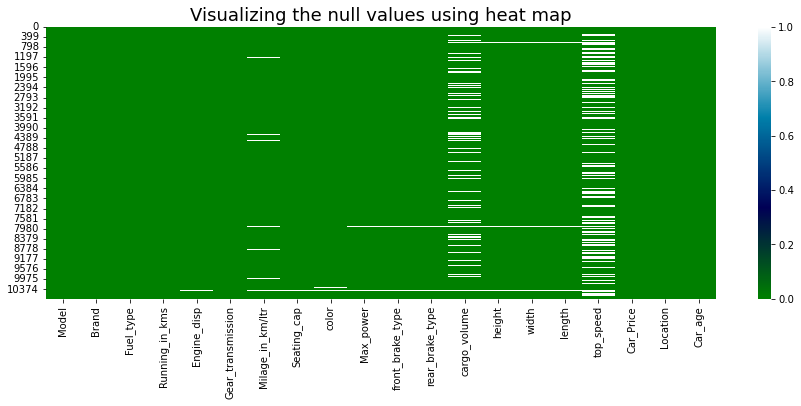

In [86]:
# Let's visualize the null values clearly using heat map
plt.figure(figsize=(15,5))
sns.heatmap(df.isnull(), cmap="ocean")
plt.title("Visualizing the null values using heat map",fontsize=18)
plt.show()

From the heat map we can clearly notice the presence of missing values by looking at the white lines present in the map.



# Treating null values using imputation techniqies


In [89]:
df.skew()


Running_in_kms      14.780797
Engine_disp          1.487357
Milage_in_km/ltr     1.845181
Seating_cap          2.151064
Max_power           31.569402
cargo_volume         1.632590
height               1.150386
width                0.794837
length               0.170583
top_speed            0.632041
Car_Price            4.442976
Car_age              0.815128
dtype: float64

In [88]:
# Checking mean value of the column "length"
print("The mean value of 'length' is:",df["length"].mean())

# Checking the median values of the columns "Engine_disp", "Milage_in_km/ltr", "Max_power", "height", "width", "cargo_volume" and "top_speed"
print("\nThe median value of 'Engine_disp' is:",df["Engine_disp"].median())
print("The median value of 'Milage_in_km/ltr' is:",df["Milage_in_km/ltr"].median())
print("The median value of 'Max_power' is:",df["Max_power"].median())
print("The median value of 'height' is:",df["height"].median())
print("The median value of 'width' is:",df["width"].median())
print("The median value of 'cargo_volume' is:",df["cargo_volume"].median())
print("The median value of 'top_speed' is:",df["top_speed"].median())

# Checking the mode values of the categorical columns
print("\nThe mode value of 'Seating_cap' is:",df["Seating_cap"].mode())
print("The mode value of 'color' is:",df["color"].mode())
print("The mode value of 'front_brake_type' is:",df["front_brake_type"].mode())
print("The mode value of 'rear_brake_type' is:",df["rear_brake_type"].mode())

The mean value of 'length' is: 4178.4449606523185

The median value of 'Engine_disp' is: 1396.0
The median value of 'Milage_in_km/ltr' is: 18.6
The median value of 'Max_power' is: 97.6
The median value of 'height' is: 1530.0
The median value of 'width' is: 1734.0
The median value of 'cargo_volume' is: 375.0
The median value of 'top_speed' is: 172.0

The mode value of 'Seating_cap' is: 0    5.0
dtype: float64
The mode value of 'color' is: 0    White
dtype: object
The mode value of 'front_brake_type' is: 0    Disc
dtype: object
The mode value of 'rear_brake_type' is: 0    Drum
dtype: object


In [90]:
# Filling null values in the column "length" by mean value as it does not contains any outliers and skewness
df["length"] = df["length"].fillna(df["length"].mean())

# Filling null values in the remaining numerical columns using median values as these columns contains outliers 
for i in ['Engine_disp','Milage_in_km/ltr','height','Max_power','width','length','cargo_volume','top_speed']:
    df[i] = df[i].fillna(df[i].median())
    
# Filling null values in the categorical columns using mode values
for j in ['Seating_cap','front_brake_type','rear_brake_type','color']:
    df[j] = df[j].fillna(df[j].mode()[0])

In [91]:
# Checking missing values after using imputation techniques
df.isnull().sum()

Model                0
Brand                0
Fuel_type            0
Running_in_kms       0
Engine_disp          0
Gear_transmission    0
Milage_in_km/ltr     0
Seating_cap          0
color                0
Max_power            0
front_brake_type     0
rear_brake_type      0
cargo_volume         0
height               0
width                0
length               0
top_speed            0
Car_Price            0
Location             0
Car_age              0
dtype: int64

We have successfully imputed the null values using mean, median and mode methods.



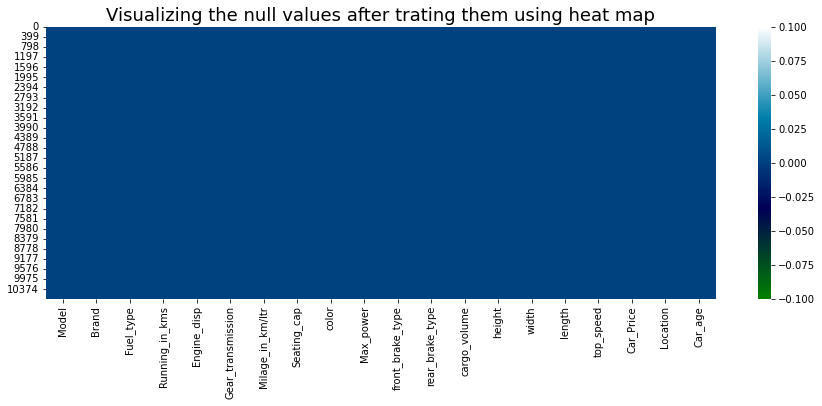

In [92]:
# Let's visualize the null values clearly using heat map
plt.figure(figsize=(15,5))
sns.heatmap(df.isnull(), cmap="ocean")
plt.title("Visualizing the null values after trating them using heat map",fontsize=18)
plt.show()

It is clear from the heat map that there are no null values in any of the column.



In [93]:
# Checking whether the target column contains any space in it
df.loc[df['Car_Price']==" "]

,Model,Brand,Fuel_type,Running_in_kms,Engine_disp,Gear_transmission,Milage_in_km/ltr,Seating_cap,color,Max_power,front_brake_type,rear_brake_type,cargo_volume,height,width,length,top_speed,Car_Price,Location,Car_age


It seems that there are no spaces in the target column.



In [ ]:
# Checking the uniqueness of target column
df["Car_Price"].unique()


These are the unique values present in the target column.



We have successfully cleaned our dataset. Let's take a look at the dataset after cleaning.



In [95]:
# Let's check the dataframe after cleaning 
df.head()

,Model,Brand,Fuel_type,Running_in_kms,Engine_disp,Gear_transmission,Milage_in_km/ltr,Seating_cap,color,Max_power,front_brake_type,rear_brake_type,cargo_volume,height,width,length,top_speed,Car_Price,Location,Car_age
0,Swift,Maruti,Petrol,11241.0,1197.0,Manual,21.21,5.0,White,81.8,Disc,Drum,268.0,1530.0,1735.0,3840.0,172.0,619000.0,Ahmedabad,3.0
1,Alto K10,Maruti,Petrol,27994.0,998.0,Manual,23.95,5.0,Superior white,67.0,Ventilated Disc,Drum,177.0,1475.0,1515.0,3545.0,145.0,345000.0,Ahmedabad,4.0
2,Swift,Maruti,Diesel,80728.0,1248.0,Manual,25.20,5.0,Silver,74.0,Ventilated Disc,Drum,204.0,1530.0,1735.0,3840.0,155.0,480000.0,Ahmedabad,6.0
3,SX4 S Cross,Maruti,Diesel,46390.0,1598.0,Manual,22.70,5.0,Urban Blue,118.0,Ventilated Disc,Disc,353.0,1590.0,1765.0,4300.0,180.0,635000.0,Ahmedabad,7.0
4,Compass,Jeep,Petrol,32294.0,1368.0,Automatic,16.00,5.0,Grey,160.0,Disc,Disc,408.0,1640.0,1818.0,4395.0,186.0,1705000.0,Ahmedabad,3.0


In [96]:
# Checking the dimensions of the dataset 
print("Shape of the dataset is:",df.shape)

Shape of the dataset is: (10748, 20)


After cleaning the data we have left with 20 columns and 12608 rows.



# Description of Dataset


In [97]:
# Statistical summary of dataset
df.describe()

,Running_in_kms,Engine_disp,Milage_in_km/ltr,Seating_cap,Max_power,cargo_volume,height,width,length,top_speed,Car_Price,Car_age
count,1.074800e+04,10748.000000,10748.000000,10748.000000,10748.000000,10748.000000,10748.000000,10748.000000,10748.000000,10748.000000,1.074800e+04,10748.000000
mean,5.544121e+04,1523.778563,18.810567,5.269352,118.281783,380.018701,1578.386677,1745.625233,4178.444961,175.826200,1.028223e+06,6.398214
std,4.427871e+04,531.760302,3.988625,0.759373,251.537236,128.157808,123.214383,136.074485,413.552429,22.874304,1.347341e+06,3.548513
min,1.450000e+02,0.000000,7.080000,2.000000,25.500000,29.000000,1281.000000,1410.000000,3099.000000,81.000000,3.000000e+04,0.000000
25%,3.044950e+04,1197.000000,16.470000,5.000000,81.800000,296.000000,1490.000000,1682.000000,3920.000000,165.000000,3.850000e+05,4.000000
50%,5.109800e+04,1396.000000,18.600000,5.000000,97.600000,375.000000,1530.000000,1734.000000,4160.000000,172.000000,6.050000e+05,6.000000
75%,7.300000e+04,1798.000000,21.100000,5.000000,126.000000,465.000000,1645.000000,1811.000000,4456.000000,180.000000,1.050000e+06,8.000000
max,2.171000e+06,5998.000000,120.000000,10.000000,9066.000000,1780.000000,1995.000000,2220.000000,5462.000000,312.000000,1.720000e+07,32.000000


The describe() method gives the statistical information of the dataset. The summary of this dataset looks perfect since there are no negative/ invalid values present. It gives the summary of numerical data.



# Separating numerical and categorical columns


In [98]:
# Separating numerical and categorical columns in the dataset

# Checking for categorical columns
categorical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        categorical_col.append(i)
print("Categorical columns present in the dataset are:\n",categorical_col)

# Now checking for numerical columns
numerical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]!='object':
        numerical_col.append(i)
print("\nNumerical columns present in the dataset are:\n",numerical_col)

Categorical columns present in the dataset are:
 ['Model', 'Brand', 'Fuel_type', 'Gear_transmission', 'color', 'front_brake_type', 'rear_brake_type', 'Location']

Numerical columns present in the dataset are:
 ['Running_in_kms', 'Engine_disp', 'Milage_in_km/ltr', 'Seating_cap', 'Max_power', 'cargo_volume', 'height', 'width', 'length', 'top_speed', 'Car_Price', 'Car_age']


# Data Visualization


# Univariate Analysis


# Plotting categorical Variables


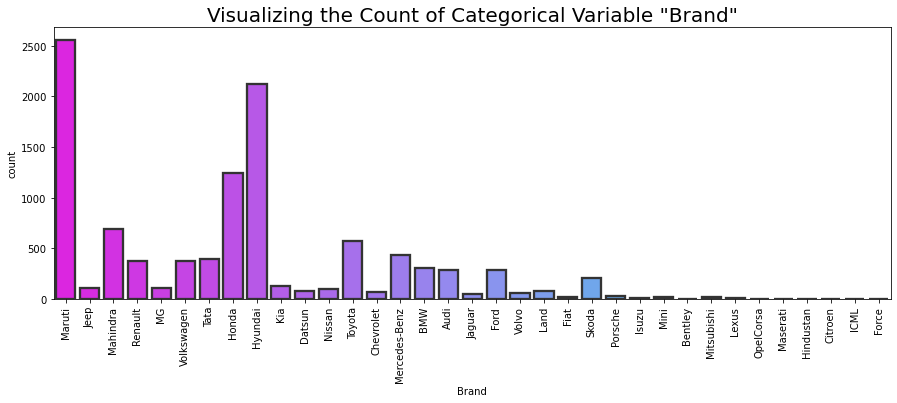

In [99]:
# Plotting count plot for categorical variable "Brand" of the used cars
plt.figure(figsize=(15,5))

plt.title('Visualizing the Count of Categorical Variable "Brand"',fontsize=20)
sns.countplot(df['Brand'],palette = "cool_r", linewidth=2.3, edgecolor=".2")
plt.xticks(rotation=90)
plt.show()

Observations

The above count plot gives the count of cars' brand. From the graph we can conclude that we are having most of the cars from Maruti and Hyundai brand as the count is high for these brands.

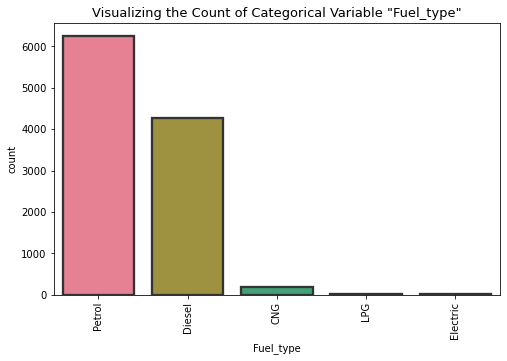

In [100]:
# Plotting count plot for categorical variable "Fuel_type" of the used cars
plt.figure(figsize=(8,5))

plt.title('Visualizing the Count of Categorical Variable "Fuel_type"',fontsize=13)
sns.countplot(df['Fuel_type'],palette ="husl", linewidth=2.3, edgecolor=".2")
plt.xticks(rotation=90)
plt.show()

Observations:


The above plot gives the count of fuel types used by the cars. More number of cars are using petrol followed by diesel as fuel. And very few cars uses CNG, LPG and Electricity as fuel type.


Manual       7548
Automatic    3200
Name: Gear_transmission, dtype: int64


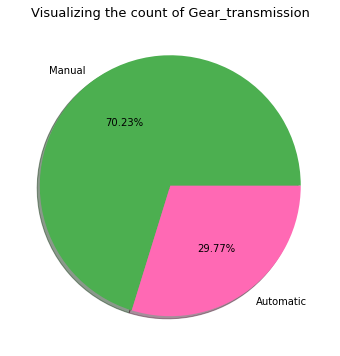

In [101]:
# Visualizing the count of Gear_transmission of the car 
print(df["Gear_transmission"].value_counts())
labels='Manual','Automatic'
colors = ["#4CAF50", "hotpink"]
fig, ax = plt.subplots(figsize=(10,6))
ax.pie(df['Gear_transmission'].value_counts(), labels=labels, autopct='%1.2f%%', shadow=True,colors=colors)
plt.title("Visualizing the count of Gear_transmission",fontsize=13)
plt.show()

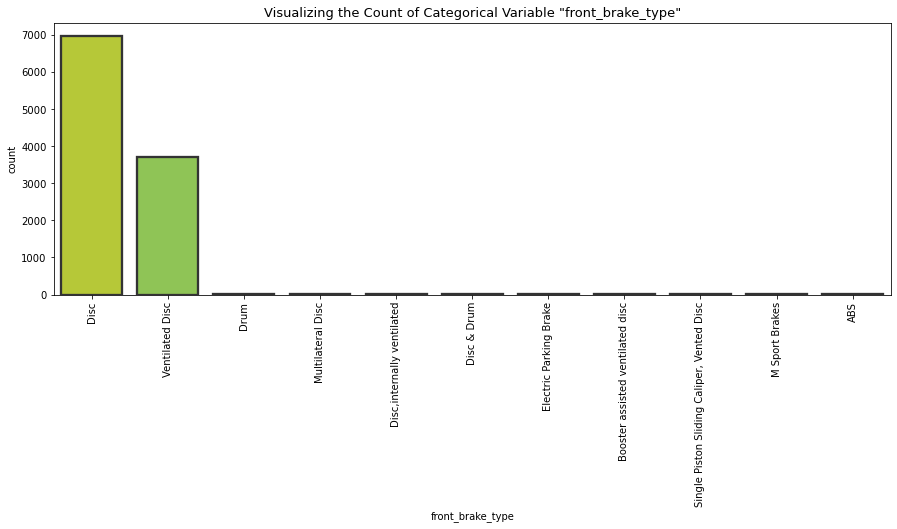

In [102]:
# Visualizinf the counts of front_brake_type of the used cars
plt.figure(figsize=(15,5))

plt.title('Visualizing the Count of Categorical Variable "front_brake_type"',fontsize=13)
sns.countplot(df['front_brake_type'],palette ="viridis_r", linewidth=2.3, edgecolor=".2")
plt.xticks(rotation=90)
plt.show()

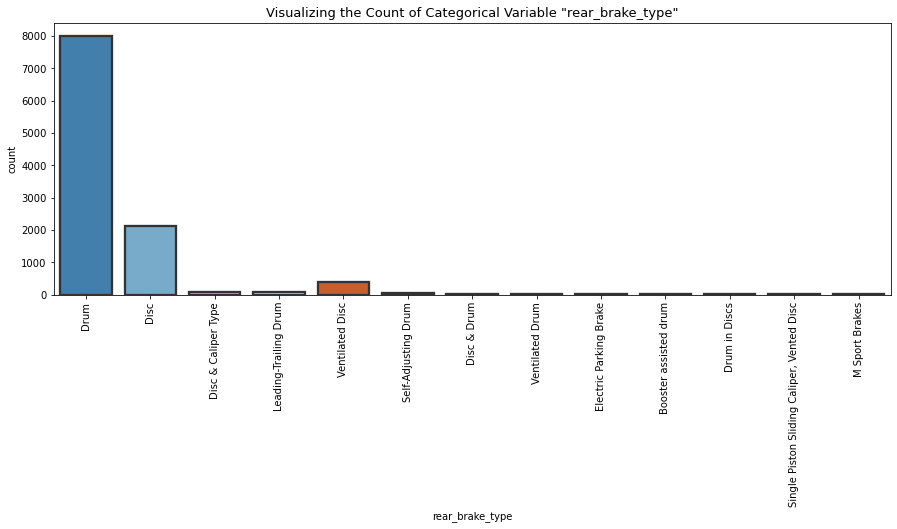

In [103]:
# Visualizinf the counts of rear_brake_type of the used cars
plt.figure(figsize=(15,5))

plt.title('Visualizing the Count of Categorical Variable "rear_brake_type"',fontsize=13)
sns.countplot(df['rear_brake_type'],palette ="tab20c", linewidth=2.3, edgecolor=".2")
plt.xticks(rotation=90)
plt.show()

Mumbai       1740
Delhi_NCR    1700
Gurgaon      1184
Pune         1035
Hyderabad     967
Chennai       930
Ahmedabad     815
Kolkata       787
Jaipur        592
Bangalore     520
Lucknow       312
Agra          166
Name: Location, dtype: int64


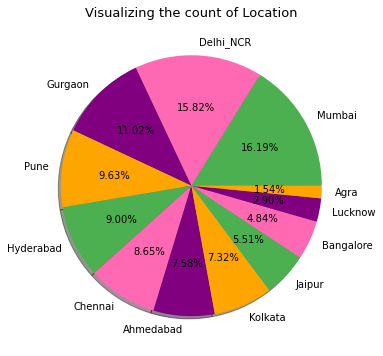

In [104]:
# Visualizing the count of Location of the car 
print(df["Location"].value_counts())
labels='Mumbai','Delhi_NCR','Gurgaon','Pune','Hyderabad','Chennai','Ahmedabad','Kolkata','Jaipur','Bangalore','Lucknow','Agra'
colors = ["#4CAF50", "hotpink","purple","orange"]
fig, ax = plt.subplots(figsize=(10,6))
ax.pie(df['Location'].value_counts(), labels=labels, autopct='%1.2f%%', shadow=True,colors=colors)
plt.title("Visualizing the count of Location",fontsize=13)
plt.show()

# Distribution of skewness


# Plotting Numerical Variables


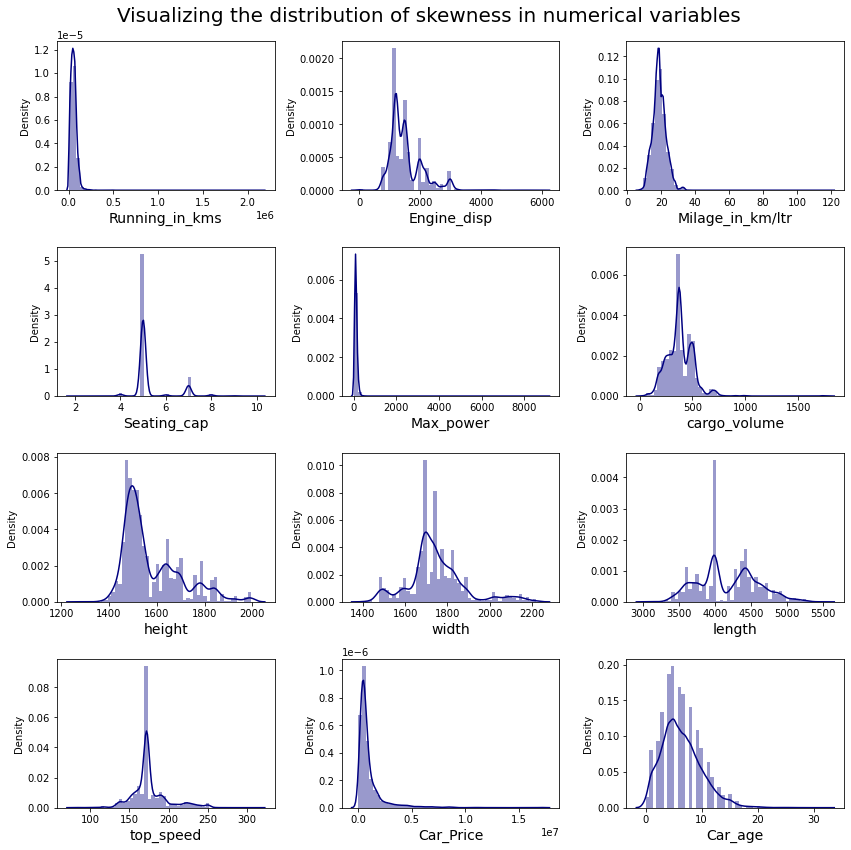

In [105]:
# Checking how the data has been distriubted in each column

plt.figure(figsize=(12,12),facecolor='white')
plt.suptitle("Visualizing the distribution of skewness in numerical variables",fontsize=20)
plotnumber=1
for column in numerical_col:
    if plotnumber<=12:
        ax=plt.subplot(4,3,plotnumber)
        sns.distplot(df[column],color="navy")
        plt.xlabel(column,fontsize=14)
    plotnumber+=1
plt.tight_layout()

# Bivariate Analysis


## Visualizing Categorical Variables vs Car_Price


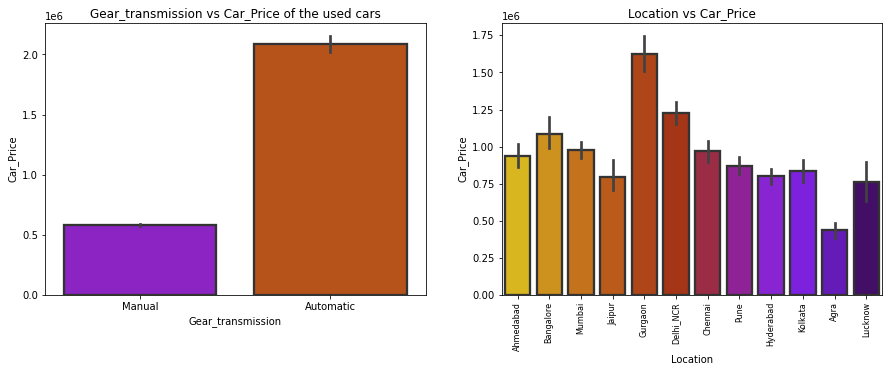

In [106]:
plt.figure(figsize=(15,5))

# Comparing Car_Price and Gear_transmission of the used cars
plt.subplot(1,2,1)
sns.barplot(df['Gear_transmission'],df['Car_Price'],palette="gnuplot", linewidth=2.3, edgecolor=".2");
plt.title('Gear_transmission vs Car_Price of the used cars')

# Comparing Car_Price and Location of the used cars
plt.subplot(1,2,2)
sns.barplot(df['Location'],df['Car_Price'],palette="gnuplot_r", linewidth=2.3, edgecolor=".2");
plt.title('Location vs Car_Price')
plt.xticks(fontsize='8')
plt.xticks(rotation=90)
plt.show()

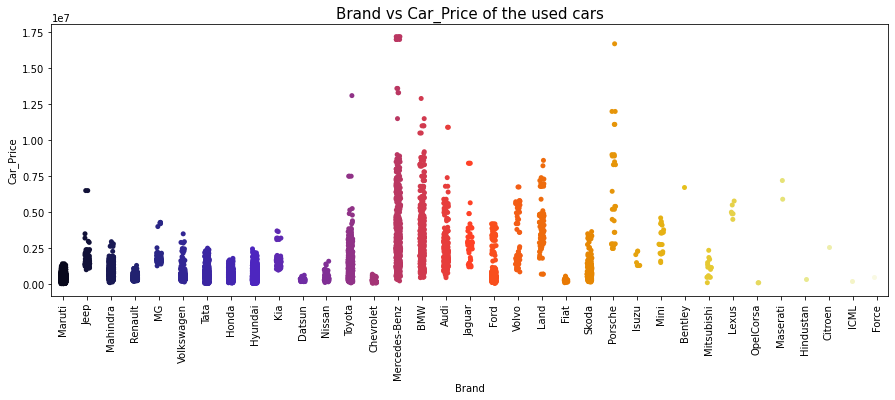

In [107]:
# Comparing Car_Price and Brand of the used cars
plt.figure(figsize=(15,5))
sns.stripplot(df['Brand'],df['Car_Price'],palette="CMRmap");
plt.title('Brand vs Car_Price of the used cars',fontsize=15)
plt.xticks(rotation=90)
plt.show()


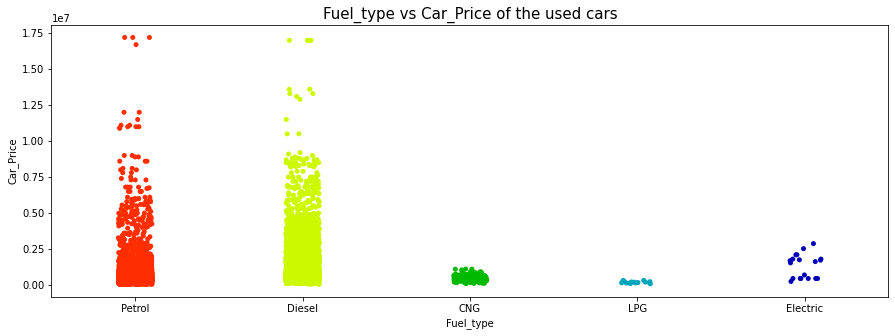

In [108]:
# Comparing Car_Price and Fuel_type of the used cars
plt.figure(figsize=(15,5))
sns.stripplot(df['Fuel_type'],df['Car_Price'],palette="nipy_spectral_r");
plt.title('Fuel_type vs Car_Price of the used cars',fontsize=15)
plt.show()

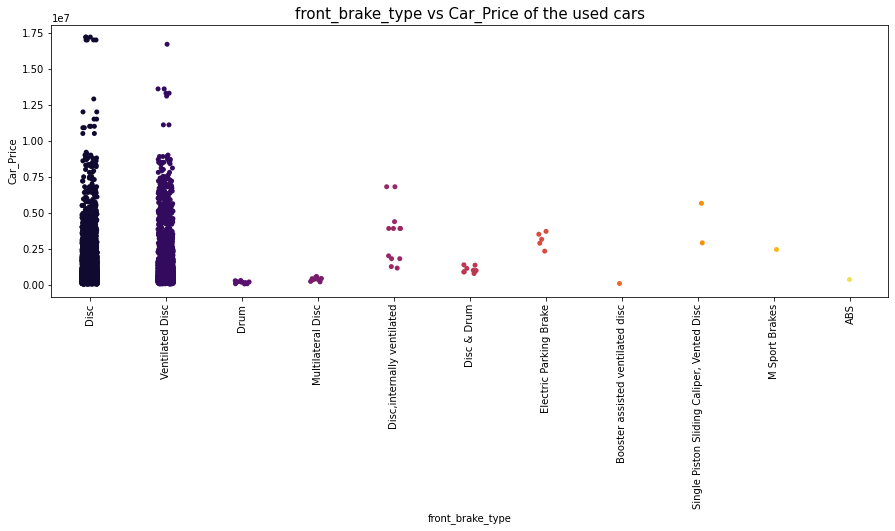

In [109]:
# Comparing Car_Price and front_brake_type of the used cars
plt.figure(figsize=(15,5))
sns.stripplot(df['front_brake_type'],df['Car_Price'],palette="inferno");
plt.title('front_brake_type vs Car_Price of the used cars',fontsize=15)
plt.xticks(rotation=90)
plt.show()

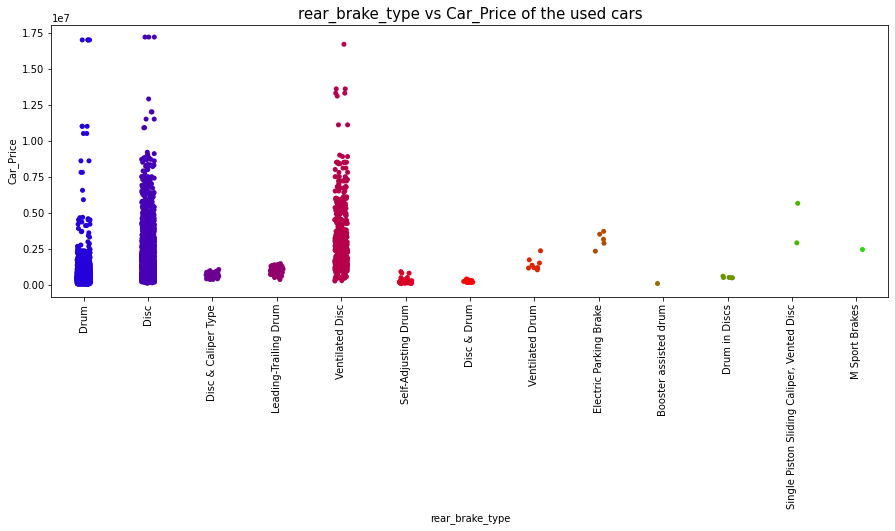

In [110]:
# Comparing Car_Price and rear_brake_type of the used cars
plt.figure(figsize=(15,5))
sns.stripplot(df['rear_brake_type'],df['Car_Price'],palette="brg");
plt.title('rear_brake_type vs Car_Price of the used cars',fontsize=15)
plt.xticks(rotation=90)
plt.show()

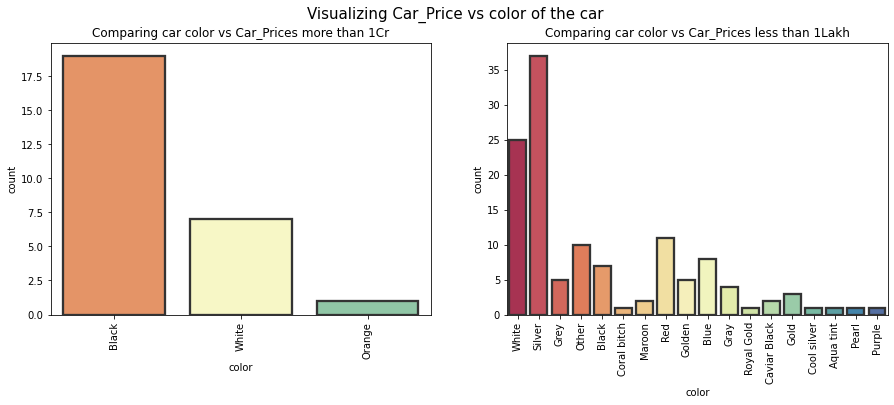

In [111]:
plt.figure(figsize = (15,5))
plt.suptitle("Visualizing Car_Price vs color of the car",fontsize=15)
plt.subplot(1,2,1)
plt.title("Comparing car color vs Car_Prices more than 1Cr")
sns.countplot(x = 'color', data = df.loc[df['Car_Price']>= 10000000], palette='Spectral',linewidth=2.3, edgecolor=".2")
plt.xticks(rotation = 90)
plt.subplot(1,2,2)
plt.title("Comparing car color vs Car_Prices less than 1Lakh")
sns.countplot(x = 'color', data = df.loc[df['Car_Price']<= 100000], palette='Spectral',linewidth=2.3, edgecolor=".2")
plt.xticks(rotation = 90)
plt.show()

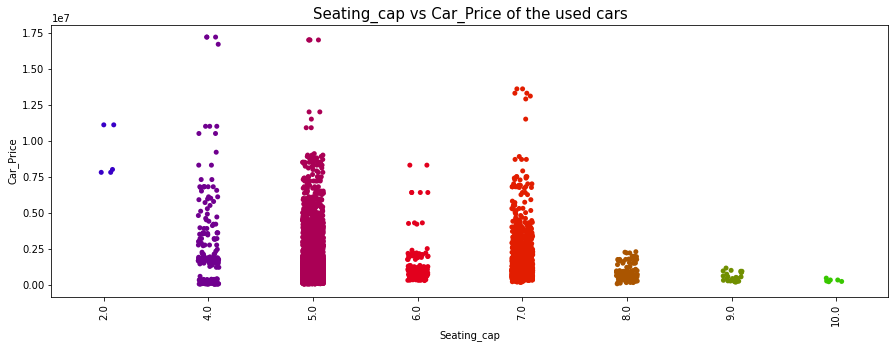

In [112]:
# Comparing Car_Price and Seating_cap of the used cars
plt.figure(figsize=(15,5))
sns.stripplot(df['Seating_cap'],df['Car_Price'],palette="brg");
plt.title('Seating_cap vs Car_Price of the used cars',fontsize=15)
plt.xticks(rotation=90)
plt.show()

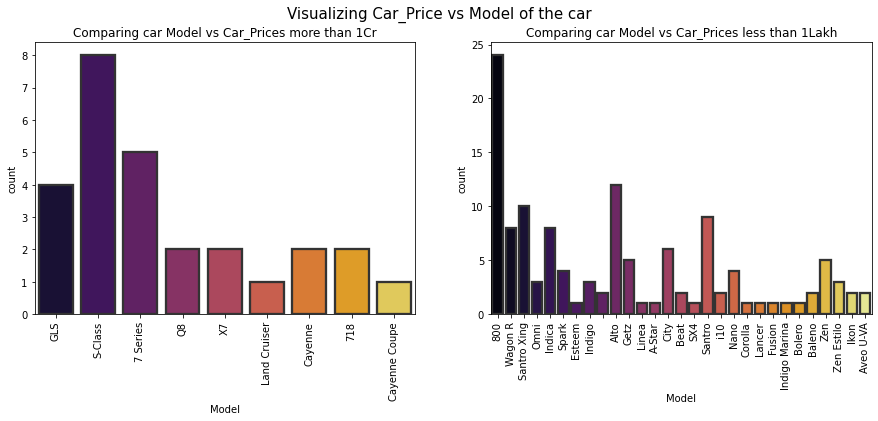

In [113]:
plt.figure(figsize = (15,5))
plt.suptitle("Visualizing Car_Price vs Model of the car",fontsize=15)
plt.subplot(1,2,1)
plt.title("Comparing car Model vs Car_Prices more than 1Cr")
sns.countplot(x = 'Model', data = df.loc[df['Car_Price']>= 10000000], palette='inferno',linewidth=2.3, edgecolor=".2")
plt.xticks(rotation = 90)
plt.subplot(1,2,2)
plt.title("Comparing car Model vs Car_Prices less than 1Lakh")
sns.countplot(x = 'Model', data = df.loc[df['Car_Price']<= 100000], palette='inferno',linewidth=2.3, edgecolor=".2")
plt.xticks(rotation = 90)
plt.show()

# Visualizing Numerical Variables vs Car_Price


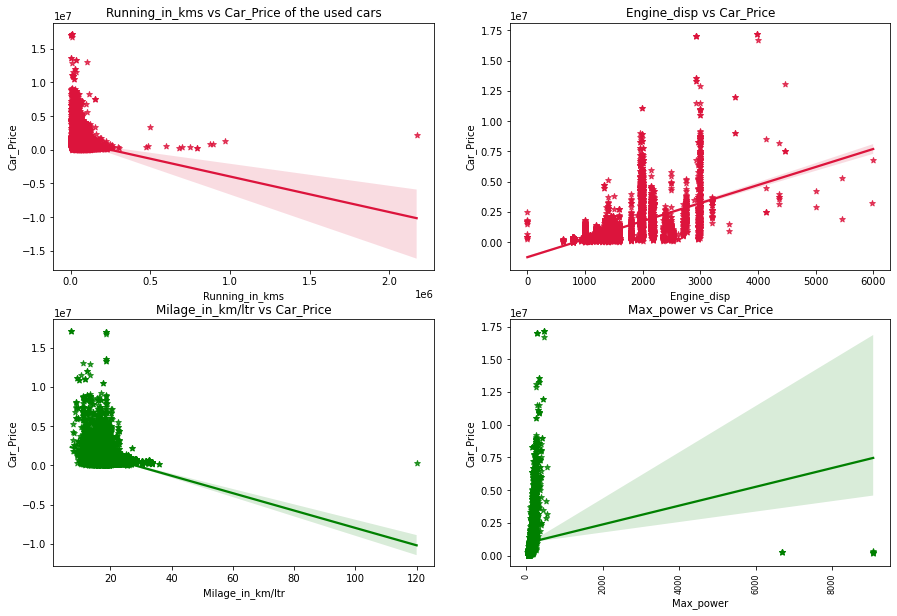

In [114]:
plt.figure(figsize=(15,10))

# Comparing Car_Price and 'Running_in_kms' of the used cars
plt.subplot(2,2,1)
sns.regplot(x= df['Running_in_kms'],y= df['Car_Price'],marker="*",color='crimson')
plt.title('Running_in_kms vs Car_Price of the used cars',fontsize=12)

# Comparing Car_Price and 'Engine_disp' of the used cars
plt.subplot(2,2,2)
sns.regplot(x= df['Engine_disp'],y= df['Car_Price'],marker="*",color='crimson')
plt.title('Engine_disp vs Car_Price',fontsize=12)

# Comparing Car_Price and 'Milage_in_km/ltr' of used cars
plt.subplot(2,2,3)
sns.regplot(x= df['Milage_in_km/ltr'],y= df['Car_Price'],marker="*",color='g')
plt.title('Milage_in_km/ltr vs Car_Price',fontsize=12)

# Comparing Car_Price vs 'Max_power' of the cars
plt.subplot(2,2,4)
sns.regplot(x= df['Max_power'],y= df['Car_Price'],marker="*",color='g')
plt.title('Max_power vs Car_Price',fontsize=12)
plt.xticks(fontsize='8')
plt.xticks(rotation=90)
plt.show()

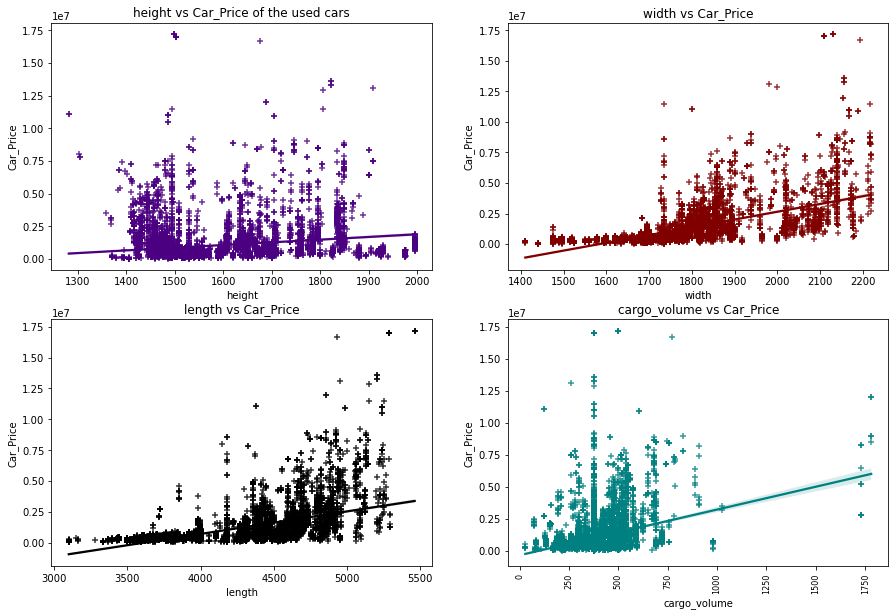

In [115]:
plt.figure(figsize=(15,10))

# Comparing Car_Price and 'height' of the used cars
plt.subplot(2,2,1)
sns.regplot(x= df['height'],y= df['Car_Price'],marker="+",color='indigo')
plt.title('height vs Car_Price of the used cars',fontsize=12)

# Comparing Car_Price and 'width' of the used cars
plt.subplot(2,2,2)
sns.regplot(x= df['width'],y= df['Car_Price'],marker="+",color='maroon')
plt.title('width vs Car_Price',fontsize=12)

# Comparing Car_Price and 'length' of used cars
plt.subplot(2,2,3)
sns.regplot(x= df['length'],y= df['Car_Price'],marker="+",color='k')
plt.title('length vs Car_Price',fontsize=12)

# Comparing Car_Price vs 'cargo_volume' of the cars
plt.subplot(2,2,4)
sns.regplot(x= df['cargo_volume'],y= df['Car_Price'],marker="+",color='teal')
plt.title('cargo_volume vs Car_Price',fontsize=12)
plt.xticks(fontsize='8')
plt.xticks(rotation=90)
plt.show()

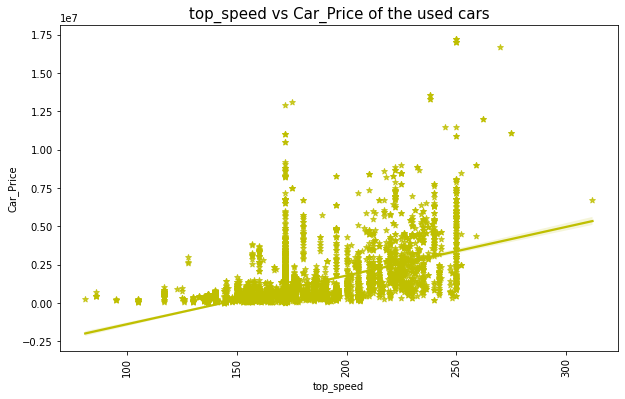

In [116]:
# Comparing Car_Price and 'top_speed' of the used cars
plt.figure(figsize=(10,6))
sns.regplot(x= df['top_speed'],y= df['Car_Price'],marker="*",color='y')
plt.title('top_speed vs Car_Price of the used cars',fontsize=15)
plt.xticks(rotation=90)
plt.show()

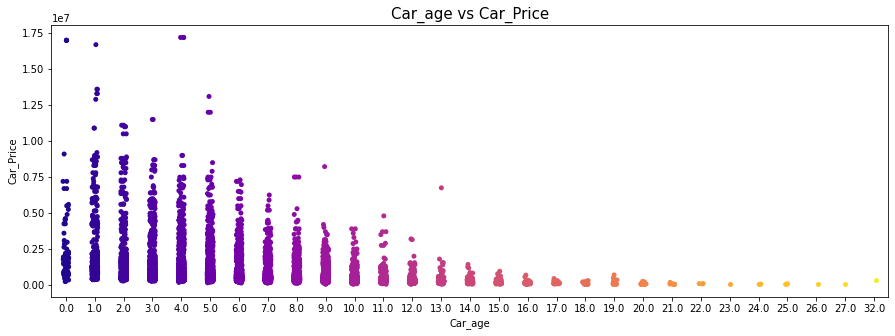

In [117]:
# Comparing Car_Price and 'Car_age' of the used cars
plt.figure(figsize=(15,5))
sns.stripplot(df['Car_age'],df['Car_Price'],palette="plasma")
plt.title('Car_age vs Car_Price',fontsize=15)
plt.show()

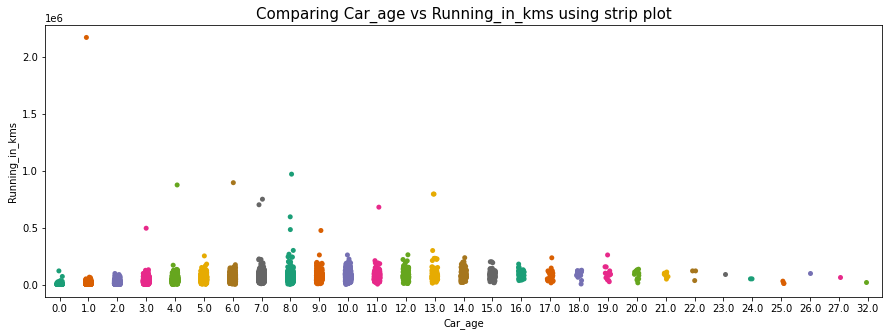

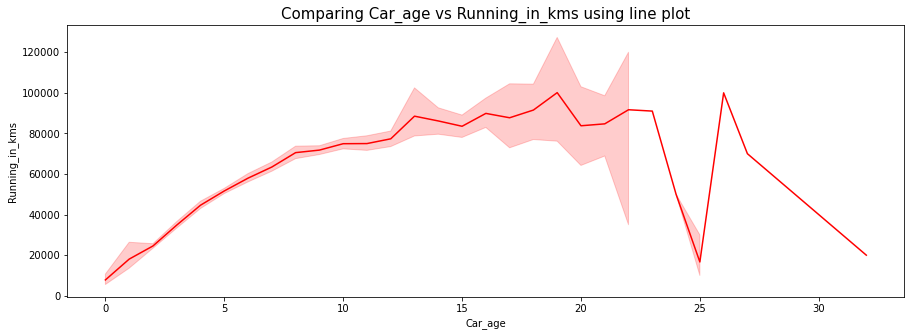

In [118]:
# Checking the relation between car age and running in kms
plt.figure(figsize = (15,5))
sns.stripplot(x = 'Car_age', y = 'Running_in_kms', data = df, palette = "Dark2")
plt.title("Comparing Car_age vs Running_in_kms using strip plot",fontsize=15)

plt.figure(figsize = (15,5))
sns.lineplot(x = 'Car_age', y = 'Running_in_kms', data = df, color = "r")
plt.title("Comparing Car_age vs Running_in_kms using line plot",fontsize=15)
plt.show()
plt.show()

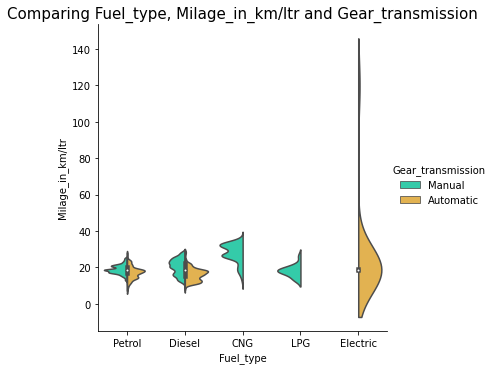

In [119]:
# Lets check the relation between fuel_type, Gear_transmission and Mileage of the cars
sns.catplot(x="Fuel_type", y="Milage_in_km/ltr", hue="Gear_transmission", kind="violin", split=True, palette="turbo", data=df)
plt.title("Comparing Fuel_type, Milage_in_km/ltr and Gear_transmission",fontsize=15)
plt.show()

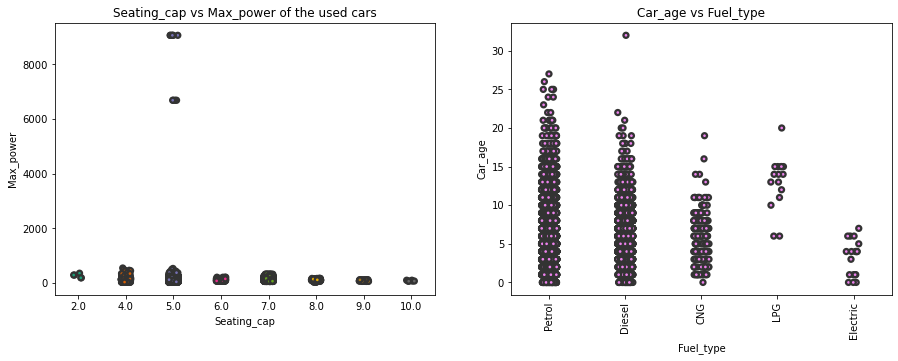

In [120]:
plt.figure(figsize=(15,5))

# Comparing Seating_cap and 'Max_power' of the used cars
plt.subplot(1,2,1)
sns.stripplot(x= df['Seating_cap'],y= df['Max_power'],palette = "Dark2",linewidth=2.3, edgecolor=".2")
plt.title('Seating_cap vs Max_power of the used cars',fontsize=12)

# Comparing Car_age and 'Fuel_type' of the used cars
plt.subplot(1,2,2)
sns.stripplot(x= df['Fuel_type'],y= df['Car_age'],linewidth=2.3, edgecolor=".2",color="violet")
plt.title('Car_age vs Fuel_type',fontsize=12)

plt.xticks(rotation=90)
plt.show()

# Multivariate Analysis


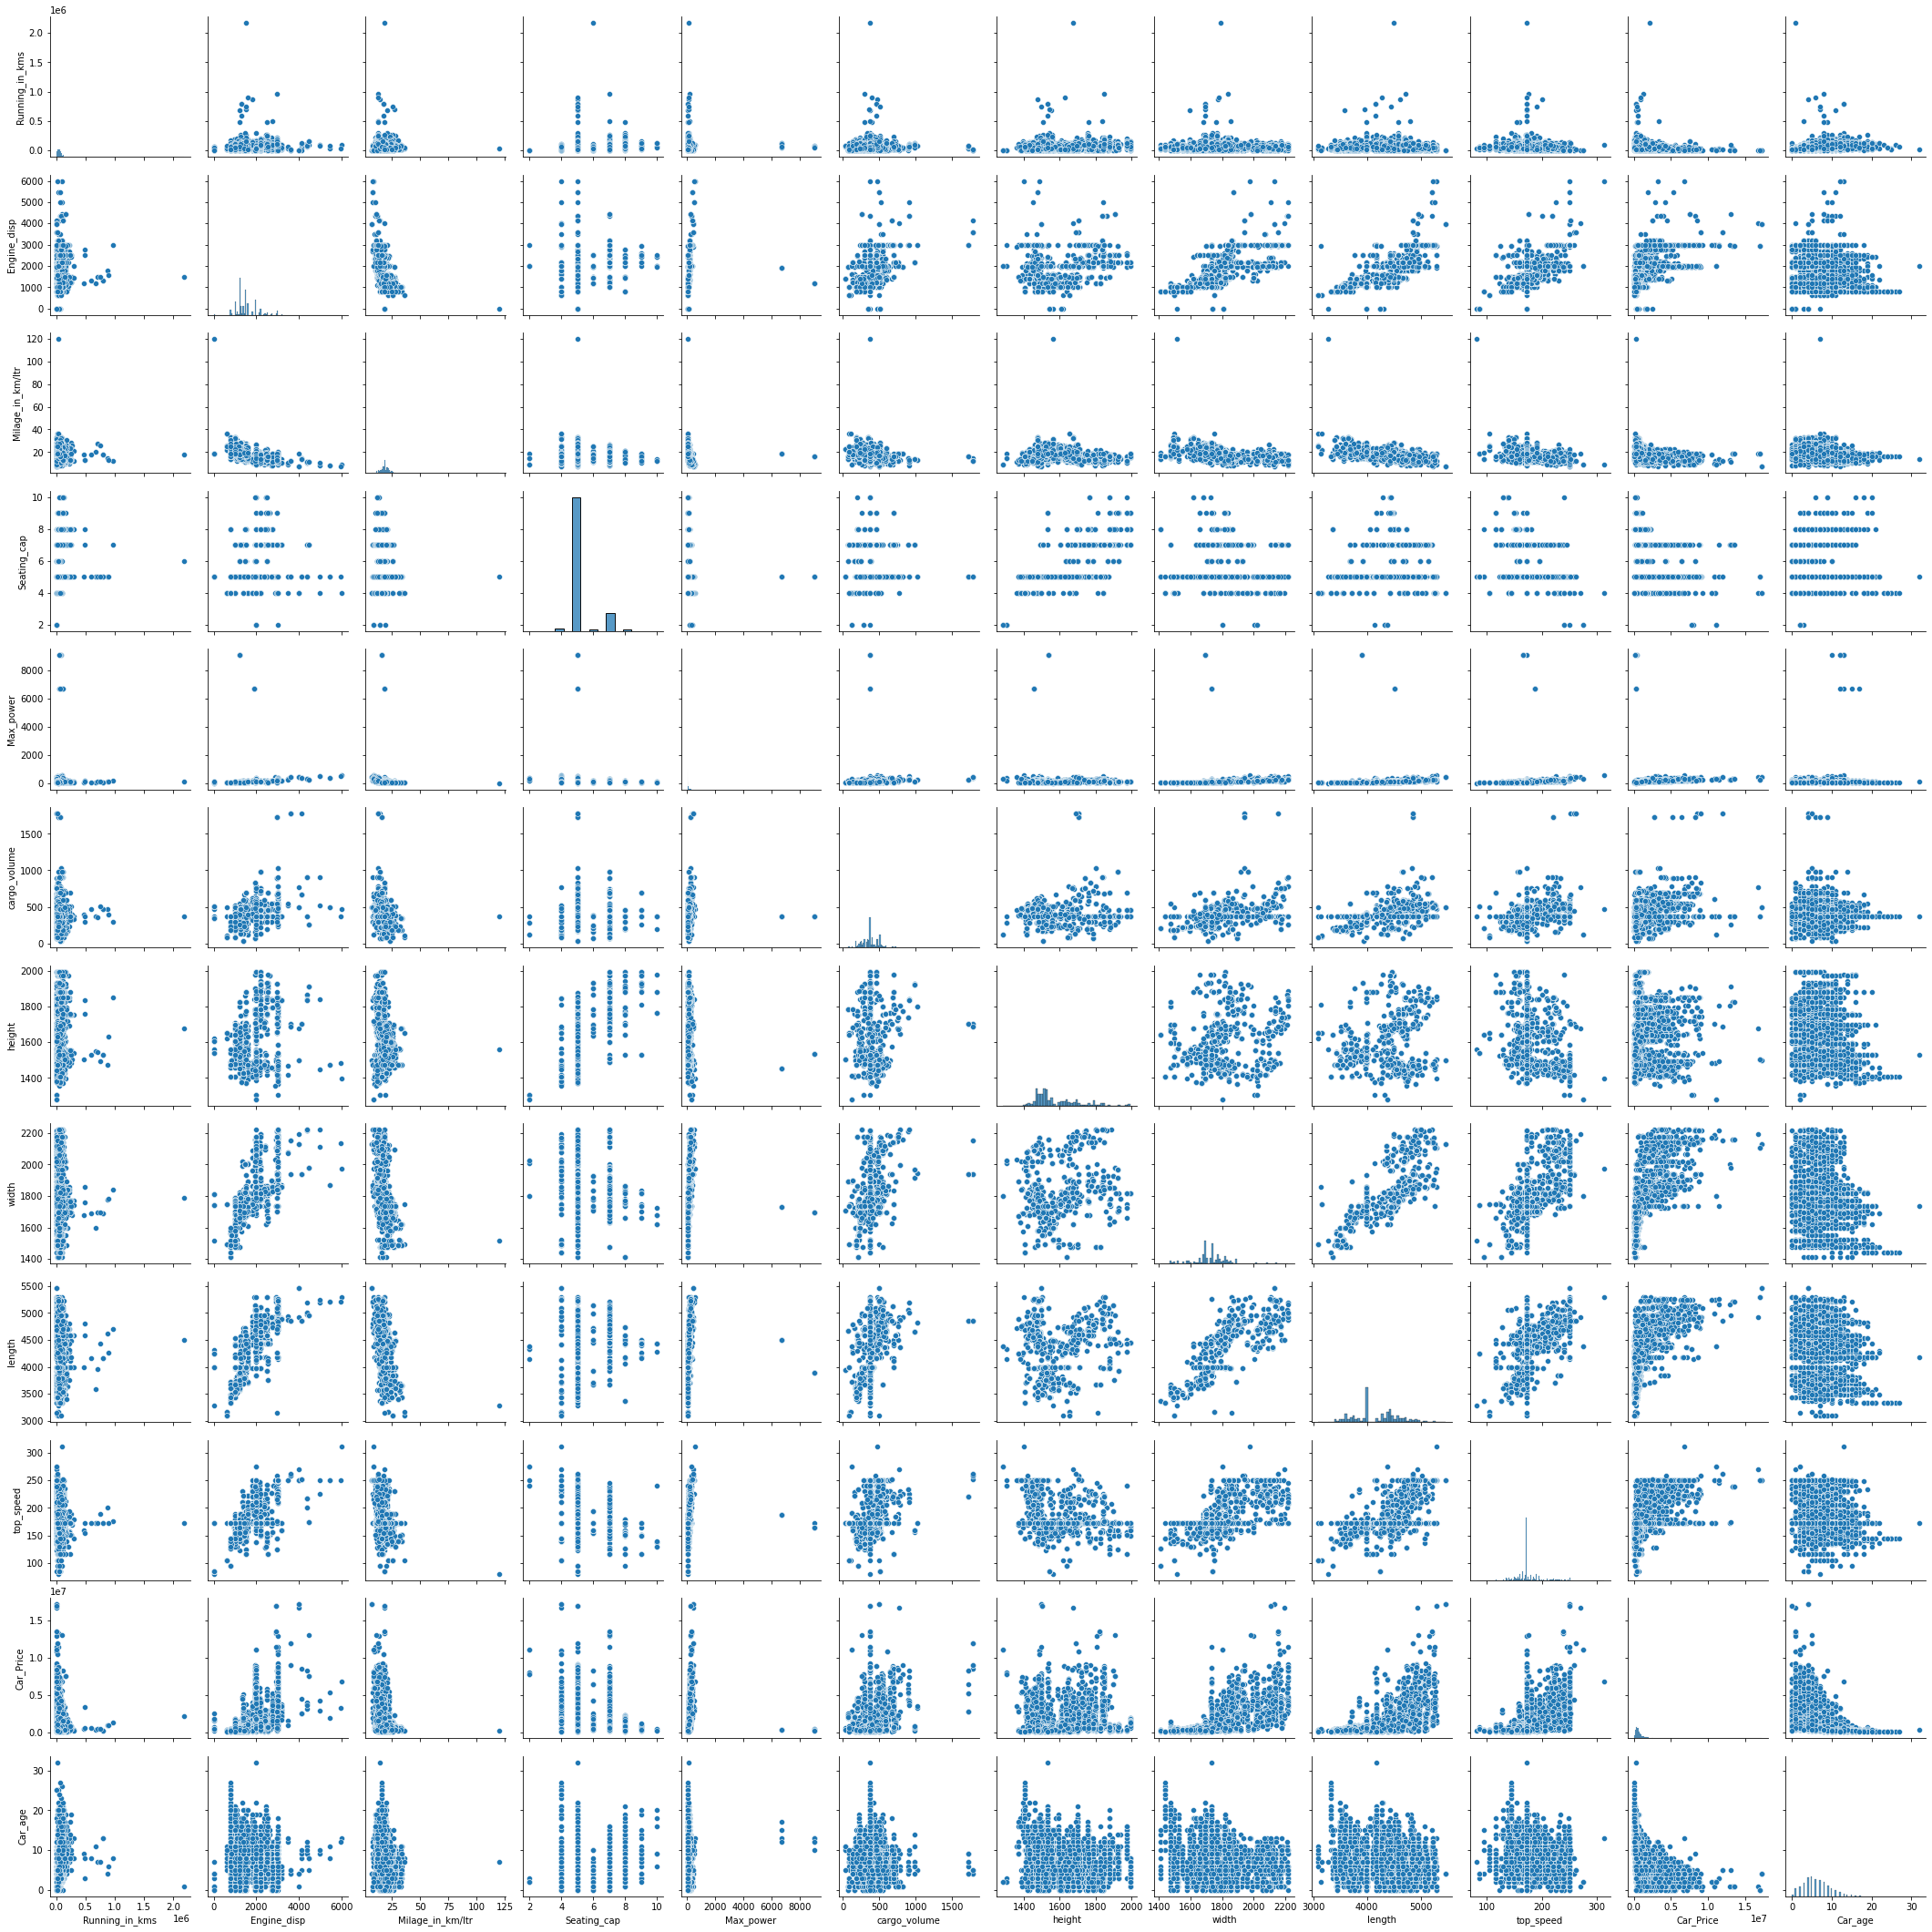

In [121]:
sns.pairplot(df,palette="husl")
plt.show()

# Identifying the outliers in the dataset using boxplots


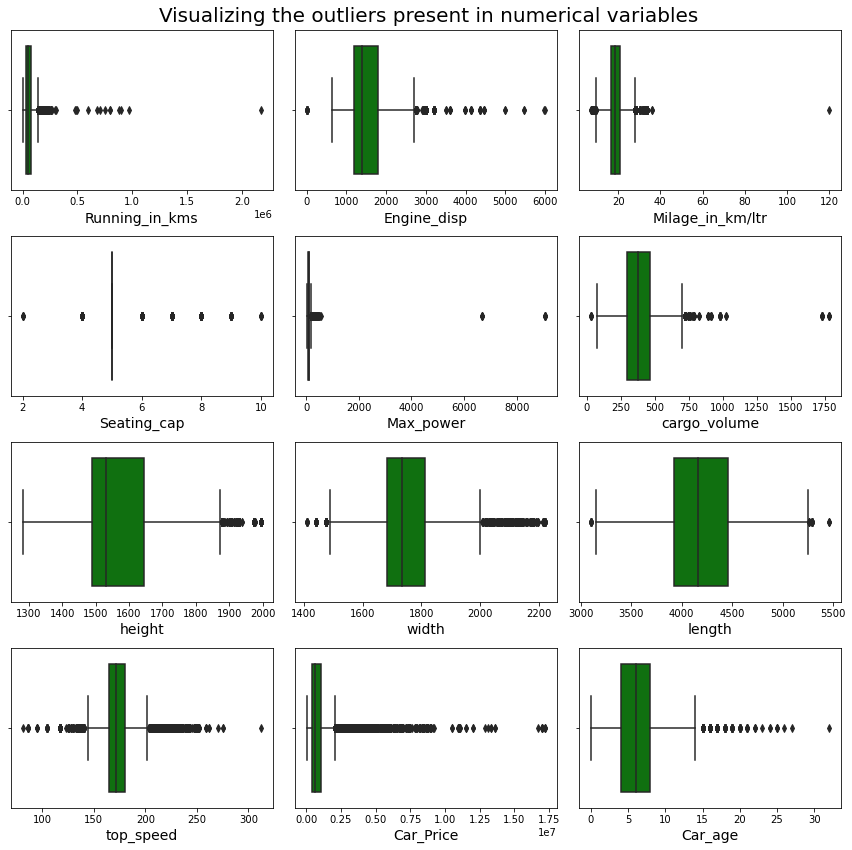

In [122]:
plt.figure(figsize=(12,12),facecolor='white')
plt.suptitle("Visualizing the outliers present in numerical variables",fontsize=20)
plotnumber=1
for column in numerical_col:
    if plotnumber<=12:
        ax=plt.subplot(4,3,plotnumber)
        sns.boxplot(df[column],color="g")
        plt.xlabel(column,fontsize=14)
    plotnumber+=1
plt.tight_layout()

# Removing outliers from dataset


# i) Zscore method


In [123]:
# Features containing outliers
features = df[['Running_in_kms','Engine_disp','Milage_in_km/ltr','Seating_cap','Max_power','cargo_volume','height','width','top_speed','Car_age']]

# Using zscore to remove outliers
from scipy.stats import zscore
z=np.abs(zscore(features))

I have listed down the numerical features having outliers and using zscore method to get rid off the outliers in these columns.



In [124]:
# Creating new dataframe
new_df = df[(z<3).all(axis=1)] 
new_df.head()

,Model,Brand,Fuel_type,Running_in_kms,Engine_disp,Gear_transmission,Milage_in_km/ltr,Seating_cap,color,Max_power,front_brake_type,rear_brake_type,cargo_volume,height,width,length,top_speed,Car_Price,Location,Car_age
0,Swift,Maruti,Petrol,11241.0,1197.0,Manual,21.21,5.0,White,81.8,Disc,Drum,268.0,1530.0,1735.0,3840.0,172.0,619000.0,Ahmedabad,3.0
1,Alto K10,Maruti,Petrol,27994.0,998.0,Manual,23.95,5.0,Superior white,67.0,Ventilated Disc,Drum,177.0,1475.0,1515.0,3545.0,145.0,345000.0,Ahmedabad,4.0
2,Swift,Maruti,Diesel,80728.0,1248.0,Manual,25.20,5.0,Silver,74.0,Ventilated Disc,Drum,204.0,1530.0,1735.0,3840.0,155.0,480000.0,Ahmedabad,6.0
3,SX4 S Cross,Maruti,Diesel,46390.0,1598.0,Manual,22.70,5.0,Urban Blue,118.0,Ventilated Disc,Disc,353.0,1590.0,1765.0,4300.0,180.0,635000.0,Ahmedabad,7.0
4,Compass,Jeep,Petrol,32294.0,1368.0,Automatic,16.00,5.0,Grey,160.0,Disc,Disc,408.0,1640.0,1818.0,4395.0,186.0,1705000.0,Ahmedabad,3.0


In [125]:
# Checking the shape of dataset before and after removing outliers
print("Shape of dataset before removing outliers:", df.shape)
print("Shape of dataset after removing outliers:", new_df.shape)

Shape of dataset before removing outliers: (10748, 20)
Shape of dataset after removing outliers: (9927, 20)


In [126]:
# Checking the data loss after removing outliers
data_loss = (10748-9927)/10748*100
data_loss

7.638630442873093

# ii) IQR (InterQuartile Range) method


In [127]:
# Removing outliers using IQR method
# 1st quantile
Q1=features.quantile(0.25)

# 3rd quantile
Q3=features.quantile(0.75)

# IQR
IQR=Q3 - Q1

df1=df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

In [128]:
print("Shape of data after using IQR method:", df1.shape)


Shape of data after using IQR method: (6855, 20)


In [129]:
# Checking the the data loss after removing outliers
data_loss = (10748-6855)/10748*100
data_loss

36.22069222180871

Using IQR method the data loss is 36.22%. So, considering Zscore method for removal of outliers which gives us lower data loss.



# Checking for skewness in the data


In [130]:
# Checking the skewness
new_df.skew()

Running_in_kms      0.616776
Engine_disp         1.236400
Milage_in_km/ltr    0.204530
Seating_cap         2.344797
Max_power           1.234486
cargo_volume        0.248233
height              1.130179
width               0.664697
length              0.172766
top_speed           0.944055
Car_Price           3.548235
Car_age             0.557807
dtype: float64

# Removing skewness using yeo-johnson method


In [131]:
# Removing skewness using yeo-johnson  method to get better prediction
skew1 = ["Running_in_kms","Engine_disp","Seating_cap","Max_power","height","width","top_speed"]

from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')

In [132]:
new_df[skew1] = scaler.fit_transform(new_df[skew1].values)
new_df[skew1].head()

,Running_in_kms,Engine_disp,Seating_cap,Max_power,height,width,top_speed
0,-1.625255,-0.579227,-0.229486,-0.532492,-0.227267,0.062031,-0.054877
1,-0.795763,-1.137487,-0.229486,-1.184789,-0.941534,-2.025443,-1.704215
2,0.932379,-0.445688,-0.229486,-0.853678,-0.227267,0.062031,-1.034261
3,-0.104376,0.389615,-0.229486,0.539992,0.422067,0.304647,0.349030
4,-0.620559,-0.144432,-0.229486,1.320209,0.844134,0.712835,0.631722


In [133]:
# Checking skewness after using yeo-johnson method
new_df[skew1].skew()

Running_in_kms   -0.067702
Engine_disp       0.300023
Seating_cap      -0.880502
Max_power         0.011740
height            0.529991
width            -0.027002
top_speed        -0.046989
dtype: float64

In [134]:
# Dropping irrelevant colum
new_df.drop("height",axis=1,inplace=True)

# Encoding the categorical columns using Label Encoder Method


In [135]:
# Converting categorical data into numerical using Label Encoder method
from sklearn.preprocessing import LabelEncoder

LE=LabelEncoder()
new_df[categorical_col]= new_df[categorical_col].apply(LE.fit_transform)

In [136]:
# Displaying the categorical columns after encoding 
new_df[categorical_col].head()

,Model,Brand,Fuel_type,Gear_transmission,color,front_brake_type,rear_brake_type,Location
0,209,18,4,1,362,2,4,1
1,25,18,4,1,326,6,4,1
2,209,18,1,1,302,6,4,1
3,192,18,1,1,353,6,1,1
4,64,12,4,0,155,2,1,1


# Correlation between the label and features using HEAT map


In [138]:
# Checking the correlation between features and the target
cor = new_df.corr()
cor

,Model,Brand,Fuel_type,Running_in_kms,Engine_disp,Gear_transmission,Milage_in_km/ltr,Seating_cap,color,Max_power,front_brake_type,rear_brake_type,cargo_volume,width,length,top_speed,Car_Price,Location,Car_age
Model,1.000000,0.113867,-0.034330,0.032737,-0.075074,0.127202,0.031839,0.048025,0.024821,-0.071352,-0.011857,-0.046879,-0.112692,-0.012067,-0.156655,-0.089397,-0.106930,0.027658,0.022582
Brand,0.113867,1.000000,-0.050879,0.020744,0.018785,0.051199,-0.015291,0.167180,-0.028603,-0.096897,0.042189,-0.023676,-0.074379,-0.029793,0.017465,-0.178796,-0.008491,0.029956,-0.084283
Fuel_type,-0.034330,-0.050879,1.000000,-0.306846,-0.483364,0.104179,-0.147356,-0.247866,-0.034680,-0.327062,-0.099266,0.088691,-0.200031,-0.424944,-0.378390,-0.194601,-0.283920,0.036233,0.009150
Running_in_kms,0.032737,0.020744,-0.306846,1.000000,0.140492,0.157317,0.031010,0.149692,0.043477,-0.020683,0.161383,0.034477,0.063465,-0.017460,0.073073,-0.014380,-0.279399,-0.003553,0.581844
Engine_disp,-0.075074,0.018785,-0.483364,0.140492,1.000000,-0.392141,-0.584607,0.290874,-0.002200,0.828637,0.087961,-0.190534,0.513520,0.726873,0.803161,0.529934,0.549951,-0.007848,0.014159
Gear_transmission,0.127202,0.051199,0.104179,0.157317,-0.392141,1.000000,0.339109,0.025153,0.041174,-0.517508,-0.000926,0.179259,-0.287545,-0.432943,-0.429018,-0.423309,-0.528649,-0.011148,0.179452
Milage_in_km/ltr,0.031839,-0.015291,-0.147356,0.031010,-0.584607,0.339109,1.000000,-0.214676,-0.007704,-0.601472,0.019777,0.167118,-0.352488,-0.453750,-0.530900,-0.322582,-0.340466,-0.018140,-0.125528
Seating_cap,0.048025,0.167180,-0.247866,0.149692,0.290874,0.025153,-0.214676,1.000000,0.056452,0.148129,0.039806,-0.015781,0.003340,0.177957,0.281968,-0.086889,0.092189,0.007711,-0.017635
color,0.024821,-0.028603,-0.034680,0.043477,-0.002200,0.041174,-0.007704,0.056452,1.000000,-0.029098,0.007203,0.003045,-0.011325,-0.018969,-0.021241,-0.047357,-0.044757,-0.044985,0.006204
Max_power,-0.071352,-0.096897,-0.327062,-0.020683,0.828637,-0.517508,-0.601472,0.148129,-0.029098,1.000000,-0.001960,-0.277474,0.561337,0.831971,0.867415,0.704624,0.650341,-0.011185,-0.131365


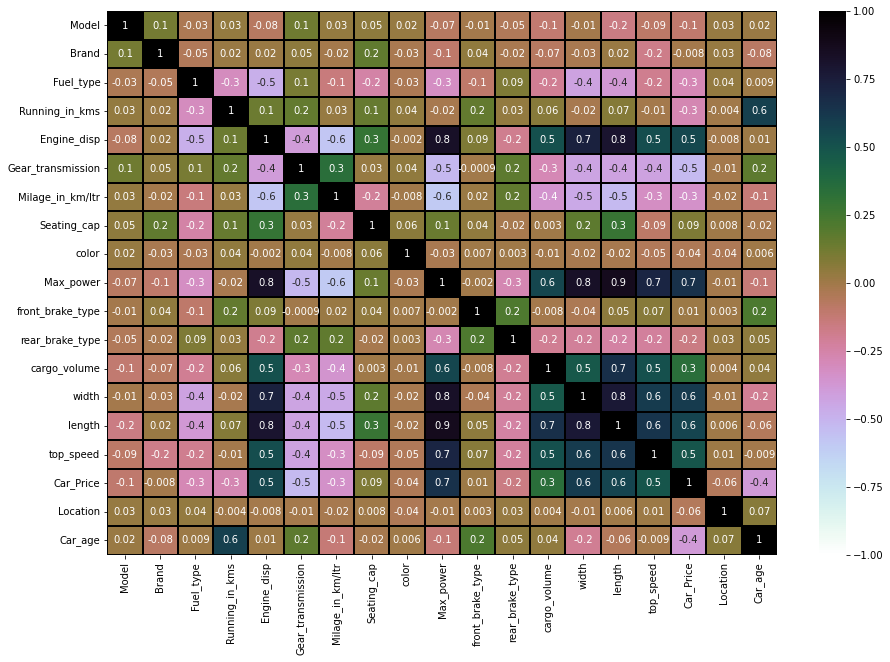

In [139]:
# Visualizing the correlation matrix by plotting heat map.
plt.figure(figsize=(15,10))    
sns.heatmap(new_df.corr(),linewidths=.1,vmin=-1, vmax=1,fmt='.1g',linecolor="black",annot=True,cmap="cubehelix_r")
plt.yticks(rotation=0);

In [140]:
# Checking the positive and negative relation between label and features 
cor['Car_Price'].sort_values(ascending=False)

Car_Price            1.000000
Max_power            0.650341
width                0.606860
length               0.569215
Engine_disp          0.549951
top_speed            0.487094
cargo_volume         0.341091
Seating_cap          0.092189
front_brake_type     0.014986
Brand               -0.008491
color               -0.044757
Location            -0.059532
Model               -0.106930
rear_brake_type     -0.158737
Running_in_kms      -0.279399
Fuel_type           -0.283920
Milage_in_km/ltr    -0.340466
Car_age             -0.389658
Gear_transmission   -0.528649
Name: Car_Price, dtype: float64

# Visualizing the correlation between label and features using bar plot


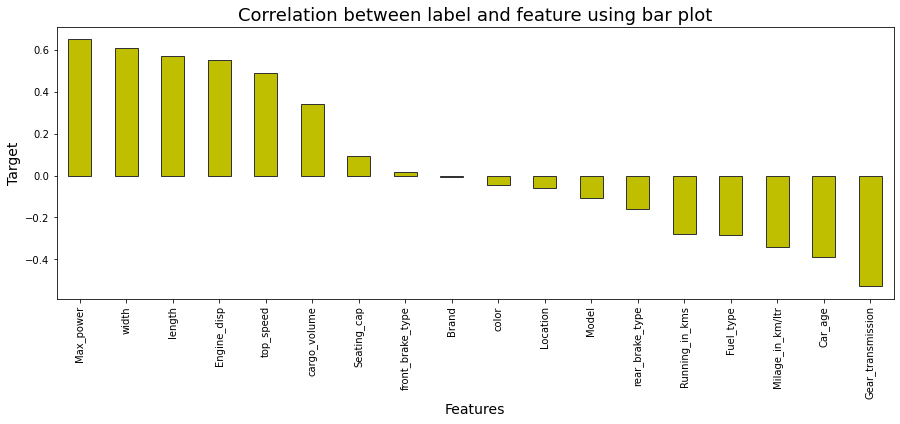

In [142]:
plt.figure(figsize=(15,5))
new_df.corr()['Car_Price'].sort_values(ascending=False).drop(['Car_Price']).plot(kind='bar',color='y',edgecolor=".2")
plt.xlabel('Features',fontsize=14)
plt.ylabel('Target',fontsize=14)
plt.title('Correlation between label and feature using bar plot',fontsize=18)
plt.show()

# Separating the feature and label into x and y


In [143]:
x = new_df.drop("Car_Price", axis=1)
y = new_df["Car_Price"]

We have separated both dependent and independent variables.



In [144]:
# Dimension of x and y
x.shape, y.shape

((9927, 18), (9927,))

# Feature Scaling Using StandardScaler


In [145]:
from sklearn.preprocessing import StandardScaler

scaling = StandardScaler()
x = pd.DataFrame(scaling.fit_transform(x), columns=x.columns)
x.head()

,Model,Brand,Fuel_type,Running_in_kms,Engine_disp,Gear_transmission,Milage_in_km/ltr,Seating_cap,color,Max_power,front_brake_type,rear_brake_type,cargo_volume,width,length,top_speed,Location,Car_age
0,0.872773,0.378591,0.792266,-1.625255,-0.579227,0.630070,0.622786,-0.229486,1.044397,-0.532492,-0.724217,0.262276,-0.931852,0.062031,-0.797911,-0.054877,-1.565006,-0.98196
1,-1.382709,0.378591,0.792266,-0.795763,-1.137487,0.630070,1.389947,-0.229486,0.740085,-1.184789,1.383002,0.262276,-1.722452,-2.025443,-1.551317,-1.704215,-1.565006,-0.68353
2,0.872773,0.378591,-1.236842,0.932379,-0.445688,0.630070,1.739929,-0.229486,0.537211,-0.853678,1.383002,0.262276,-1.487878,0.062031,-0.797911,-1.034261,-1.565006,-0.08667
3,0.664386,0.378591,-1.236842,-0.104376,0.389615,0.630070,1.039965,-0.229486,0.968319,0.539992,1.383002,-1.681200,-0.193379,0.304647,0.376891,0.349030,-1.565006,0.21176
4,-0.904645,-0.397965,0.792266,-0.620559,-0.144432,-1.587125,-0.835939,-0.229486,-0.705395,1.320209,-0.724217,-1.681200,0.284456,0.712835,0.619514,0.631722,-1.565006,-0.98196


# Checking Variance Inflation Factor (VIF)


In [146]:
# Finding varience inflation factor in each scaled column i.e, x.shape[1] (1/(1-R2))

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i)
              for i in range(len(x.columns))]
vif["Features"] = x.columns

# Let's check the values
vif

,VIF values,Features
0,1.133713,Model
1,1.180301,Brand
2,2.494943,Fuel_type
3,1.856018,Running_in_kms
4,5.296379,Engine_disp
5,1.472995,Gear_transmission
6,3.085731,Milage_in_km/ltr
7,1.477926,Seating_cap
8,1.015784,color
9,9.736068,Max_power


In [147]:
# Dropping Max_power column as it contains high VIF value
x.drop(["Max_power"],axis=1,inplace=True)

In [148]:
# Again checking VIF value to confirm whether the multicollinearity still exists or not
vif=pd.DataFrame()
vif["vif_Features"]=[variance_inflation_factor(x.values, i) 
                     for i in range(x.shape[1])]
vif["Features"]=x.columns
vif

,vif_Features,Features
0,1.118687,Model
1,1.119873,Brand
2,2.494011,Fuel_type
3,1.855761,Running_in_kms
4,4.616198,Engine_disp
5,1.440519,Gear_transmission
6,2.902378,Milage_in_km/ltr
7,1.433099,Seating_cap
8,1.015149,color
9,1.171188,front_brake_type


I have successfully completed preprocessing and data cleaning in the dataset. Now it is time to build my machine learning models.


# Building Machine Learning Models


## Finding the Best Random State and Accuracy


In [149]:
from sklearn.ensemble import RandomForestRegressor
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state=i)
    mod = RandomForestRegressor()
    mod.fit(x_train, y_train)
    pred = mod.predict(x_test)
    acc=r2_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Maximum r2 score is ",maxAccu," on Random_state ",maxRS)

Maximum r2 score is  0.9723248700359086  on Random_state  18


# Feature Importance


In [150]:
# Lets check the feature importance using Random Forest Regressor

RFR = RandomForestRegressor()
RFR.fit(x_train, y_train)
importances = pd.DataFrame({'Features':x.columns, 'Importance':np.round(RFR.feature_importances_,3)})
importances = importances.sort_values('Importance', ascending=False).set_index('Features')
importances

,Importance
Features,
Engine_disp,0.375
Car_age,0.192
width,0.135
length,0.089
top_speed,0.078
Gear_transmission,0.030
Running_in_kms,0.019
cargo_volume,0.017
Brand,0.016


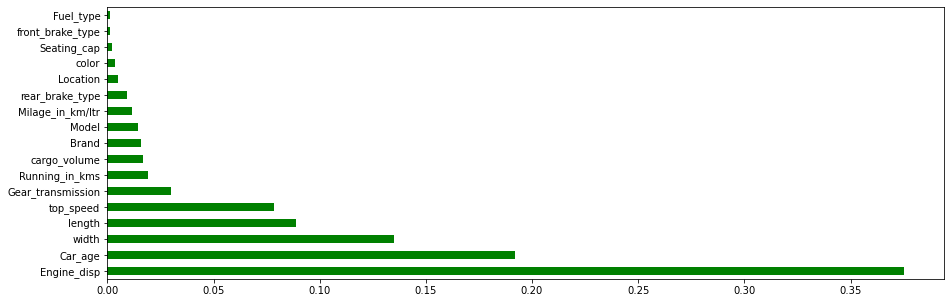

In [151]:
plt.figure(figsize=(15,5))
importances=pd.Series(RFR.feature_importances_,index=x.columns)
importances.nlargest(30).plot(kind='barh',color="g")
plt.show()

# Creating new train test split


In [152]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=18)


# ML Regression Algorithms with Evaluation Metrics


In [153]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import BaggingRegressor
import xgboost as xgb
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn import metrics

i) Decision Tree Regressor


R2_Score: 94.46304448072841
Mean Absolute Error: 115142.60892917086
Mean Squared Error: 57248783611.58174
Root Mean Squared Error: 239267.180389584

Cross Validation Score: 90.17623738927828

R2 Score - Cross Validation Score is 4.286807091450129


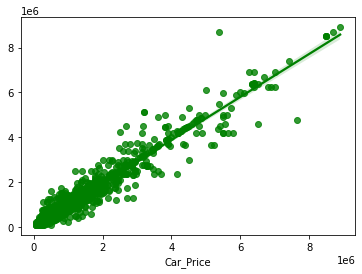

In [154]:
# Checking R2 score for Decision Tree Regressor
DTR=DecisionTreeRegressor()
DTR.fit(x_train,y_train)

# prediction
predDTR=DTR.predict(x_test)
R2_score = r2_score(y_test,predDTR)*100    
print('R2_Score:',R2_score) 
# Evaluation Metrics
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, predDTR))    
print('Mean Squared Error:',metrics.mean_squared_error(y_test, predDTR))     
print("Root Mean Squared Error:",np.sqrt(metrics.mean_squared_error(y_test, predDTR)))

# Cross Validation Score
cv_score = (cross_val_score(DTR, x, y, cv=5).mean())*100
print("\nCross Validation Score:", cv_score)

# Difference of R2 score minus cv scores
Difference = R2_score - cv_score
print("\nR2 Score - Cross Validation Score is", Difference)
# Visualizing the predicted values
sns.regplot(y_test,predDTR,color="g")
plt.show()

# ii) Random Forest Regressor


R2_Score: 97.25019734043194
Mean Absolute Error: 91509.46187348476
Mean Squared Error: 28431302524.328938
Root Mean Squared Error: 168615.84304070877

Cross Validation Score: 94.06312408172475

R2 Score - Cross Validation Score is 3.187073258707187


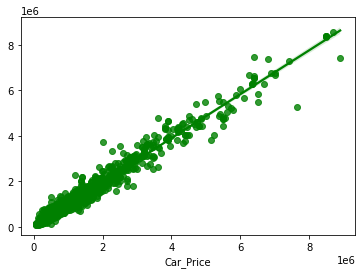

In [156]:
# Checking R2 score for Random Forest Regressor
RFR=RandomForestRegressor()
RFR.fit(x_train,y_train)

# prediction
predRFR=RFR.predict(x_test)
R2_score = r2_score(y_test,predRFR)*100      # R squared score
print('R2_Score:',R2_score) 
# Evaluation Metrics
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, predRFR))    
print('Mean Squared Error:',metrics.mean_squared_error(y_test, predRFR))     
print("Root Mean Squared Error:",np.sqrt(metrics.mean_squared_error(y_test, predRFR))) 

# Cross Validation Score
cv_score = (cross_val_score(RFR, x, y, cv=5).mean())*100
print("\nCross Validation Score:", cv_score)

# Difference of R2 score minus cv scores
Difference = R2_score - cv_score
print("\nR2 Score - Cross Validation Score is", Difference)

# Visualizing the predicteed values
sns.regplot(y_test,predRFR,color="g")
plt.show()

# iii) Extra Trees Regressor


R2_Score: 97.37088653669267
Mean Absolute Error: 87238.94870090635
Mean Squared Error: 27183448959.86778
Root Mean Squared Error: 164874.03967837925

Cross Validation Score: 94.81300431408701

R2 Score - Cross Validation Score is 2.557882222605656


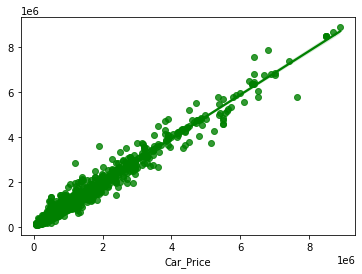

In [157]:
# Checking R2 score for Extra Trees Regressor
XT=ExtraTreesRegressor()
XT.fit(x_train,y_train)

# prediction
predXT=XT.predict(x_test)
R2_score = r2_score(y_test,predXT)*100      # R squared score
print('R2_Score:',R2_score) 
# Evaluation Metrics
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, predXT))    
print('Mean Squared Error:',metrics.mean_squared_error(y_test, predXT))     
print("Root Mean Squared Error:",np.sqrt(metrics.mean_squared_error(y_test, predXT))) 

# Cross Validation Score
cv_score = (cross_val_score(XT, x, y, cv=5).mean())*100
print("\nCross Validation Score:", cv_score)

# Difference of R2 score minus cv scores
Difference = R2_score - cv_score
print("\nR2 Score - Cross Validation Score is", Difference)

# Visualizing the predicteed values
sns.regplot(y_test,predXT,color="g")
plt.show()

# iv) GradientBoosting Regressor


R2_Score: 95.15179150216841
Mean Absolute Error: 127471.03559872472
Mean Squared Error: 50127554434.95158
Root Mean Squared Error: 223891.83646339492

Cross Validation Score: 92.57515754931109

R2 Score - Cross Validation Score is 2.576633952857321


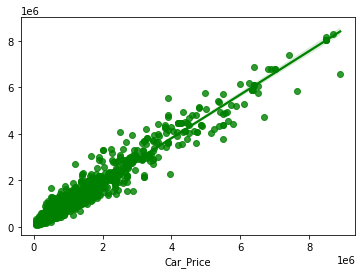

In [158]:
# Checking R2 score for GradientBoosting Regressor
GB=GradientBoostingRegressor()
GB.fit(x_train,y_train)

# prediction
predGB=GB.predict(x_test)
R2_score = r2_score(y_test,predGB)*100      # R squared score
print('R2_Score:',R2_score) 
# Evaluation Metrics
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, predGB))    
print('Mean Squared Error:',metrics.mean_squared_error(y_test, predGB))     
print("Root Mean Squared Error:",np.sqrt(metrics.mean_squared_error(y_test, predGB))) 

# Cross Validation Score
cv_score = (cross_val_score(GB, x, y, cv=5).mean())*100
print("\nCross Validation Score:", cv_score)

# Difference of R2 score minus cv scores
Difference = R2_score - cv_score
print("\nR2 Score - Cross Validation Score is", Difference)
# Visualizing the predicteed values
sns.regplot(y_test,predGB,color="g")
plt.show()

# v) Extreme Gradient Boosting Regressor (XGB)


R2_Score: 97.52630712181826
Mean Absolute Error: 81800.91661585525
Mean Squared Error: 25576493762.978138
Root Mean Squared Error: 159926.52613928102

Cross Validation Score: 94.53875723551857

R2 Score - Cross Validation Score is 2.987549886299689


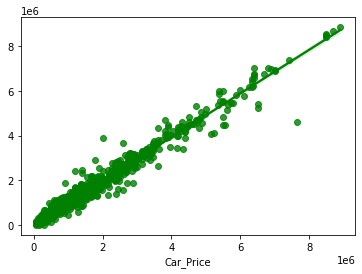

In [159]:
# Checking R2 score for XGB Regressor
from xgboost import XGBRegressor as xgb
XGB=xgb(verbosity=0)
XGB.fit(x_train,y_train)

# prediction
predXGB=XGB.predict(x_test)
R2_score = r2_score(y_test,predXGB)*100      # R squared score
print('R2_Score:',R2_score) 
# Evaluation Metrics
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, predXGB))    
print('Mean Squared Error:',metrics.mean_squared_error(y_test, predXGB))     
print("Root Mean Squared Error:",np.sqrt(metrics.mean_squared_error(y_test, predXGB))) 

# Cross Validation Score
cv_score = (cross_val_score(XGB, x, y, cv=5).mean())*100
print("\nCross Validation Score:", cv_score)

# Difference of R2 score minus cv scores
Difference = R2_score - cv_score
print("\nR2 Score - Cross Validation Score is", Difference)

# Visualizing the predicteed values
sns.regplot(y_test,predXGB,color="g")
plt.show()

# vi) Bagging Regressor


R2_Score: 96.30574806949797
Mean Absolute Error: 99926.03911027989
Mean Squared Error: 38196338879.71013
Root Mean Squared Error: 195438.83667201392

Cross Validation Score: 93.70645625743448

R2 Score - Cross Validation Score is 2.599291812063484


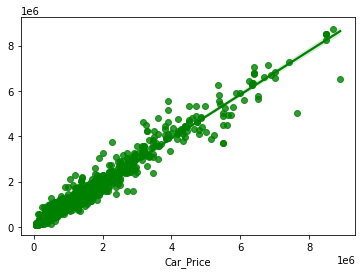

In [160]:
# Checking R2 score for BaggingRegressor
BR=BaggingRegressor()
BR.fit(x_train,y_train)

# prediction
predBR=BR.predict(x_test)
R2_score = r2_score(y_test,predBR)*100      # R squared score
print('R2_Score:',R2_score) 
# Evaluation Metrics
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, predBR))    
print('Mean Squared Error:',metrics.mean_squared_error(y_test, predBR))     
print("Root Mean Squared Error:",np.sqrt(metrics.mean_squared_error(y_test, predBR))) 
# Cross Validation Score
cv_score = (cross_val_score(BR, x, y, cv=5).mean())*100
print("\nCross Validation Score:", cv_score)

# Difference of R2 score minus cv scores
Difference = R2_score - cv_score
print("\nR2 Score - Cross Validation Score is", Difference)

# Visualizing the predicteed values
sns.regplot(y_test,predBR,color="g")
plt.show()

# vii) KNeighbors Regressor


R2_Score: 92.11251267335436
Mean Absolute Error: 143922.58865391073
Mean Squared Error: 81551866116.78473
Root Mean Squared Error: 285572.8735660737

Cross Validation Score: 88.0652042220956

R2 Score - Cross Validation Score is 4.047308451258758


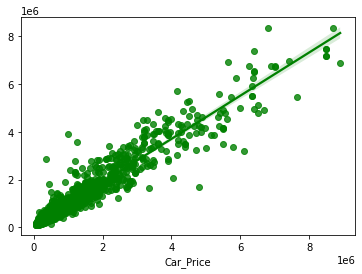

In [161]:
# Checking R2 score for KNeighborsRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
knn=KNN()
knn.fit(x_train,y_train)

# prediction
predknn=knn.predict(x_test)
R2_score = r2_score(y_test,predknn)*100      # R squared score
print('R2_Score:',R2_score) 
# Evaluation Metrics
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, predknn))    
print('Mean Squared Error:',metrics.mean_squared_error(y_test, predknn))     
print("Root Mean Squared Error:",np.sqrt(metrics.mean_squared_error(y_test, predknn))) 

# Cross Validation Score
cv_score = (cross_val_score(knn, x, y, cv=5).mean())*100
print("\nCross Validation Score:", cv_score)

# Difference of R2 score minus cv scores
Difference = R2_score - cv_score
print("\nR2 Score - Cross Validation Score is", Difference)

# Visualizing the predicteed values
sns.regplot(y_test,predknn,color="g")
plt.show()

# Hyper Parameter Tuning


In [162]:
# Let's Use the GridSearchCV to find the best paarameters in XGBRegressor
from sklearn.model_selection import GridSearchCV

#XGB Regressor
parameters = {'n_estimators' : [50,100,150,200],
              'learning_rate': [0.05,0.1,0.2,0.3,0.4],
              'gamma' : [0,0.1,0.2],
              'max_depth' : [4, 6, 8,10]}

In [163]:
GCV=GridSearchCV(xgb(),parameters,cv=5)


In [164]:
# Running GridSearchCV
GCV.fit(x_train,y_train)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    gamma=None, gpu_id=None, grow_policy=None,
                                    importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_bin=None,
                                    max_cat..._step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                       

In [165]:
# Finding best parameters
GCV.best_params_

{'gamma': 0, 'learning_rate': 0.2, 'max_depth': 4, 'n_estimators': 200}

R2_Score: 97.55118677506731
Mean absolute error: 88418.9916203791
Mean squared error: 25319253140.359993
Root Mean Squared error: 159120.24742426715


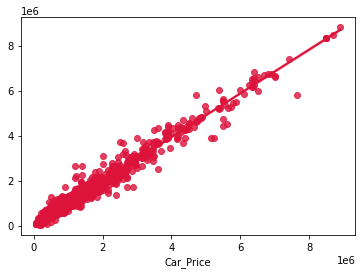

In [166]:
# Creating final model
Car_price_model = xgb(gamma=0, learning_rate=0.2, max_depth=4, n_estimators=200)

# Prediction
Car_price_model.fit(x_train, y_train)
pred = Car_price_model.predict(x_test)
print('R2_Score:',r2_score(y_test,pred)*100)

# Metric Evaluation
print('Mean absolute error:',metrics.mean_absolute_error(y_test, pred))
print('Mean squared error:',metrics.mean_squared_error(y_test, pred))
print('Root Mean Squared error:',np.sqrt(metrics.mean_squared_error(y_test, pred)))

# Visualizing the predicted values
sns.regplot(y_test,pred,color="crimson")
plt.show()

In [167]:
# Final Cross Validation Score
final_cv_score = (cross_val_score(Car_price_model, x, y, cv=5).mean())*100
print("Cross Validation Score:", final_cv_score)

Cross Validation Score: 94.92659376632966


# Saving the Final model


In [168]:
# Saving the model using joblib library 
import joblib
joblib.dump(Car_price_model,"Used_Car_Price_Prediction.pkl")

['Used_Car_Price_Prediction.pkl']

Loading the saved model and predicting Used Car Price


In [169]:
# Loading the saved model
Model=joblib.load("Used_Car_Price_Prediction.pkl")

#Prediction
prediction = Model.predict(x_test)
prediction

array([ 681073.4 ,  297298.  ,  755197.2 , ..., 1257253.2 ,  500190.12,
        487981.94], dtype=float32)

# Creating DataFrame for the predicted values


In [170]:
Predicted_Used_Car_Price = pd.DataFrame([Model.predict(x_test)[:],y_test[:]],index=["Predicted","Original"])
Predicted_Used_Car_Price

0         1            2              3          4     \
Predicted  681073.375  297298.0  755197.1875  160797.734375  5343953.0   
Original   738000.000  285000.0  825000.0000  120000.000000  5550000.0   

                 5           6            7            8           9     \
Predicted  251659.625  650220.625  343878.0625  870003.8125  849558.625   
Original   250000.000  599000.000  310000.0000  875000.0000  935000.000   

                   10          11          12          13          14    \
Predicted  288860.09375  1123404.75  632349.375  562915.625  430754.625   
Original   245000.00000  1135000.00  625000.000  565000.000  350000.000   

                  15             16          17         18           19    \
Predicted  1097946.375  257331.640625  942247.625  4260774.0  618533.9375   
Original   1400000.000  265000.000000  890000.000  4390000.0  699000.0000   

                   20         21        22            23           24    \
Predicted  450312.65625  1610710.5  471246.0  405685.15625  78713.59375   
Original   490000.00000  1725000.0  420000.0  321000.00000  79500.00000   

                  25         26            27             28          29    \
Predicted   870842.125  1230522.0  301526.09375  186859.921875  783382.375   
Original   1250000.000  1447000.0  290000.00000  177000.000000  721000.000   

                  30          31            32           33           34    \
Predicted  1256918.125  736401.375  210424.96875  643740.9375  988677.8125   
Original   1150000.000  695000.000  190000.00000  671000.0000  970000.0000   

                    35         36        37         38           39    \
Predicted  161679.234375  2420803.5  609145.5  1293747.0  338619.0625   
Original   145000.000000  1901000.0  610000.0  1445000.0  361000.0000   

               40            41          42            43         44    \
Predicted  432204.0  498417.28125  3445633.75  339568.46875  547166.75   
Original   465000.0  545000.00000  3199000.00  301000.00000  595000.00   

                45            46           47         48          49    \
Predicted  1794299.5  434866.03125  647756.8125  922608.25  471560.125   
Original   1834000.0  425000.00000  595000.0000  975000.00  381000.000   

                 50          51           52         53           54    \
Predicted  753159.875  461552.125  380399.9375  4781101.0  1933815.125   
Original   760000.000  399000.000  361000.0000  4800000.0  1380000.000   

                55           56           57          58           59    \
Predicted  1825556.5  394951.5625  421034.1875  426188.625  1732456.875   
Original   1750000.0  365000.0000  320000.0000  370000.000  1445000.000   

                   60           61         62        63             64    \
Predicted  9.861522e+05  512256.6875  1981023.0  861926.0  241858.328125   
Original   1.130000e+06  625000.0000  2250000.0  845000.0  198000.000000   

                   65            66            67            68         69    \
Predicted  475634.46875  405167.40625  338218.09375  434143.78125  1291704.0   
Original   485000.00000  395000.00000  315000.00000  455000.00000  1490000.0   

                70            71          72            73        74    \
Predicted  977123.75  411329.71875  1888005.25  494075.65625  373502.0   
Original   870000.00  385000.00000  1700000.00  550000.00000  360000.0   

                   75         76           77        78         79    \
Predicted  242589.78125  1625395.0  504562.4375  768191.0  6486102.5   
Original   235000.00000  1705000.0  550000.0000  938000.0  6400000.0   

                  80           81            82          83         84    \
Predicted  347723.8125  290981.1875  287218.59375  2601351.75  4115366.5   
Original   345000.0000  290000.0000  290000.00000  2350000.00  4000000.0   

                  85           86           87            88           89    \
Predicted  530781.5625  303255.4375  666025.8125  508776.71875  1059026.875   
Or

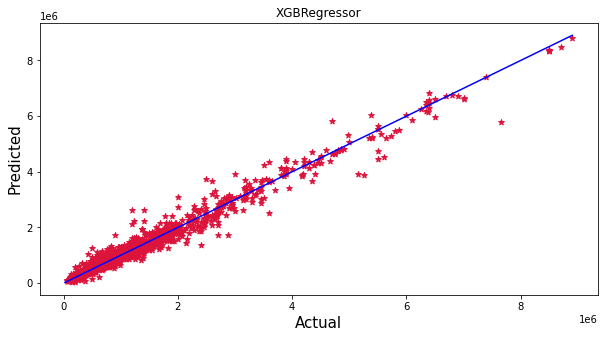

In [171]:
# Visualizing actual and predicted values
plt.figure(figsize=(10,5))
plt.scatter(y_test, prediction, c='crimson',marker="*")
p1 = max(max(prediction), max(y_test))
p2 = min(min(prediction), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Actual', fontsize=15)
plt.ylabel('Predicted', fontsize=15)
plt.title("XGBRegressor")
plt.show()


In [172]:
# Saving the predicted car price values in csv file
Predicted_Used_Car_Price.to_csv("Predicted_Used_Car_Price.csv",index=False)

# Conclusion


## Key Findings and Conclusion of the Study:


### Key Findings and Conclusion of the Study:



~The case study aims to give an idea of applying Machine Learning algorithms to predict the sale price of the used cars. After the completion of this project, we got an insight of how to collect data, pre-processing the data, analyze the data, cleaning the data and building a model.


`First we collected the used cars data from website www.cardekho.com and it was done by using Web scraping. The framework used for web scraping was Selenium, which has an advantage of automating our process of collecting data. We collected almost 10748 of data which contained the selling price of the used cars and other related features. Then, the scrapped data was saved in a excel file so that we can use further and analyse the data.


~Then we loaded the dataset and have done data cleaning, EDA process and pre-processing techniques like checking outliers, skewness, correlation, scaling data etc and got better insights from data visualization.


~From the visualizations we got to know that the continuous numerical variables having some strong positive linear relation with the label "Car_Price". By comparing car price and categorical variables we got to know that the cars having automatic gear transmission, cars from the city Delhi_NCR, cars using petrol and diesel as fuels, cars having the brands Benz and BMW and cars with 5-7 seating capacity have high sale price. While comparing continuous numerical variables and Car_Price we found that cars which are having good milage, engine displacement, less running in kms have good linear relation with the price that is the cars with this kind of qualities have high selling prices.


~After separating our train and test data, we started running different machine learning regression algorithms to find out the best performing model on the basis of different metrics like R2 Score, Mean Absolute Error, Mean Squared Error, Root Mean Squared Error. We tried many algorithms like Decision Tree Regressor, Random Forest Regressor, Extra Trees Regressor, GradientBoosting Regressor, Extreme Gradient Boosting Regressor (XGBoost), Bagging Regressor and KNeighbors Regressor.


~We got XGBoost Regressor as the best model among all the models as it gave least difference of R2 score and cross validation score and also the low evaluation metrics compared to other models. On this basis we performed the Hyperparameter tuning to finding out the best parameter and improving the scores. The R2 score increased after tuning. So we concluded that XGBoost Regressor as the best algorithm as it was giving high R2 score after tuning.


~After that we saved the model in a pickle with a filename in order to use whenever we require. Then we loaded the saved file and predicted the values.


~Overall, we can say that this dataset is good for predicting the sale price of used cars using regression analysis and conclude that XGBoost Regressor is the best working algorithm model we obtained. We can improve the data by adding some more features.